In [ ]:
!pip install -U tensorflow_datasets

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
#tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0


In [8]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [14]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [16]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


### 预处理  
每个像素点取值范围[0,255]，需标准化为[0,1]范围内

In [17]:
def normalize(images,labels):
    images = tf.cast(images, tf.float32) #类型转换
    images = images / 255
    return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

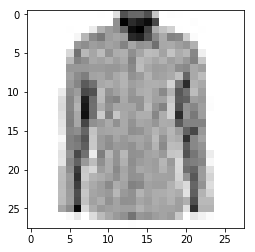

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image,label in test_dataset.take(1):break
plt.figure()
image = image.numpy().reshape((28,28))
plt.imshow(image,cmap = plt.cm.binary)
plt.show()

In [8]:
def plot_images(data):    
    plt.figure(figsize=(5,5))
    i = 0
    for image, label in data.take(25):
        image = image.numpy().reshape((28,28))
        plt.subplot(5,5,i+1)
        plt.imshow(image,cmap = plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        i+=1
    plt.show()

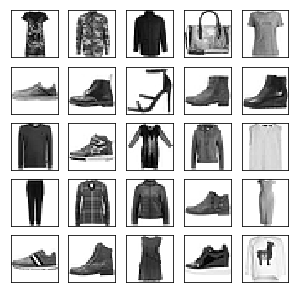

In [9]:
plot_images(train_dataset)

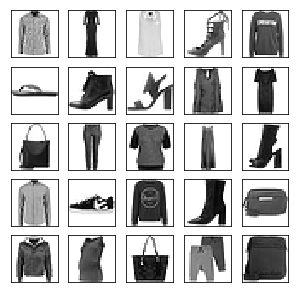

In [10]:
plot_images(test_dataset)

In [11]:
tf.__version__

'1.14.0'

### keras实现

In [12]:
from tensorflow import keras

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), padding = 'same', activation = tf.nn.relu,
                       input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Conv2D(64,(3,3), padding = 'same', activation = tf.nn.relu,
                       input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax),
    ])

In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [67]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
 398/1875 [=====>........................] - ETA: 6:16:41 - loss: 2.2838 - acc: 0.09 - ETA: 2:06:21 - loss: 2.2107 - acc: 0.25 - ETA: 1:16:08 - loss: 2.1666 - acc: 0.26 - ETA: 54:37 - loss: 2.1214 - acc: 0.2589 - ETA: 42:43 - loss: 2.0313 - acc: 0.34 - ETA: 35:05 - loss: 1.9420 - acc: 0.38 - ETA: 29:50 - loss: 1.8732 - acc: 0.39 - ETA: 25:58 - loss: 1.7893 - acc: 0.41 - ETA: 23:00 - loss: 1.7045 - acc: 0.43 - ETA: 20:40 - loss: 1.6300 - acc: 0.45 - ETA: 18:47 - loss: 1.5744 - acc: 0.46 - ETA: 17:14 - loss: 1.5189 - acc: 0.47 - ETA: 15:57 - loss: 1.4605 - acc: 0.49 - ETA: 14:51 - loss: 1.4264 - acc: 0.50 - ETA: 13:54 - loss: 1.3801 - acc: 0.52 - ETA: 13:04 - loss: 1.3412 - acc: 0.53 - ETA: 12:19 - loss: 1.3121 - acc: 0.54 - ETA: 11:40 - loss: 1.2867 - acc: 0.55 - ETA: 11:05 - loss: 1.2520 - acc: 0.56 - ETA: 10:33 - loss: 1.2150 - acc: 0.57 - ETA: 10:05 - loss: 1.1814 - acc: 0.58 - ETA: 9:39 - loss: 1.1560 - acc: 0.5923 - ETA: 9:16 - loss: 1.1337 - acc: 0.599 - ETA: 9:06 - los

 391/1875 [=====>........................] - ETA: 6:30 - loss: 0.6136 - acc: 0.812 - ETA: 2:53 - loss: 0.4054 - acc: 0.864 - ETA: 2:12 - loss: 0.3265 - acc: 0.900 - ETA: 1:52 - loss: 0.3436 - acc: 0.888 - ETA: 1:40 - loss: 0.3339 - acc: 0.885 - ETA: 1:34 - loss: 0.3495 - acc: 0.883 - ETA: 1:33 - loss: 0.3427 - acc: 0.877 - ETA: 1:31 - loss: 0.3248 - acc: 0.881 - ETA: 1:33 - loss: 0.3271 - acc: 0.882 - ETA: 1:32 - loss: 0.3153 - acc: 0.889 - ETA: 1:34 - loss: 0.3082 - acc: 0.893 - ETA: 1:35 - loss: 0.3049 - acc: 0.897 - ETA: 1:35 - loss: 0.3114 - acc: 0.892 - ETA: 1:36 - loss: 0.3101 - acc: 0.889 - ETA: 1:36 - loss: 0.3044 - acc: 0.891 - ETA: 1:36 - loss: 0.2966 - acc: 0.894 - ETA: 1:38 - loss: 0.2933 - acc: 0.894 - ETA: 1:37 - loss: 0.2968 - acc: 0.896 - ETA: 1:35 - loss: 0.3050 - acc: 0.891 - ETA: 1:33 - loss: 0.3075 - acc: 0.891 - ETA: 1:32 - loss: 0.3089 - acc: 0.891 - ETA: 1:30 - loss: 0.3026 - acc: 0.892 - ETA: 1:30 - loss: 0.2990 - acc: 0.894 - ETA: 1:30 - loss: 0.2929 - acc: 0.8

1875/1875 [==============================] - ETA: 8s - loss: 0.2566 - acc: 0.905 - ETA: 8s - loss: 0.2567 - acc: 0.905 - ETA: 8s - loss: 0.2566 - acc: 0.905 - ETA: 8s - loss: 0.2565 - acc: 0.905 - ETA: 8s - loss: 0.2564 - acc: 0.905 - ETA: 8s - loss: 0.2565 - acc: 0.905 - ETA: 8s - loss: 0.2566 - acc: 0.905 - ETA: 8s - loss: 0.2566 - acc: 0.905 - ETA: 8s - loss: 0.2566 - acc: 0.905 - ETA: 8s - loss: 0.2567 - acc: 0.905 - ETA: 8s - loss: 0.2566 - acc: 0.905 - ETA: 8s - loss: 0.2565 - acc: 0.905 - ETA: 8s - loss: 0.2564 - acc: 0.905 - ETA: 8s - loss: 0.2565 - acc: 0.905 - ETA: 7s - loss: 0.2563 - acc: 0.905 - ETA: 7s - loss: 0.2564 - acc: 0.905 - ETA: 7s - loss: 0.2563 - acc: 0.905 - ETA: 7s - loss: 0.2563 - acc: 0.905 - ETA: 7s - loss: 0.2562 - acc: 0.905 - ETA: 7s - loss: 0.2565 - acc: 0.905 - ETA: 7s - loss: 0.2564 - acc: 0.905 - ETA: 7s - loss: 0.2563 - acc: 0.905 - ETA: 7s - loss: 0.2562 - acc: 0.905 - ETA: 7s - loss: 0.2563 - acc: 0.905 - ETA: 7s - loss: 0.2564 - acc: 0.905 - ETA: 

 420/1875 [=====>........................] - ETA: 2:23 - loss: 0.1132 - acc: 0.937 - ETA: 1:34 - loss: 0.1865 - acc: 0.927 - ETA: 1:20 - loss: 0.1837 - acc: 0.937 - ETA: 1:12 - loss: 0.1722 - acc: 0.942 - ETA: 1:09 - loss: 0.1785 - acc: 0.934 - ETA: 1:06 - loss: 0.1729 - acc: 0.937 - ETA: 1:05 - loss: 0.1666 - acc: 0.939 - ETA: 1:05 - loss: 0.1704 - acc: 0.937 - ETA: 1:04 - loss: 0.1685 - acc: 0.935 - ETA: 1:04 - loss: 0.1582 - acc: 0.940 - ETA: 1:03 - loss: 0.1552 - acc: 0.944 - ETA: 1:02 - loss: 0.1553 - acc: 0.945 - ETA: 1:02 - loss: 0.1606 - acc: 0.943 - ETA: 1:01 - loss: 0.1621 - acc: 0.943 - ETA: 1:01 - loss: 0.1653 - acc: 0.941 - ETA: 1:01 - loss: 0.1743 - acc: 0.940 - ETA: 1:01 - loss: 0.1711 - acc: 0.939 - ETA: 1:01 - loss: 0.1719 - acc: 0.938 - ETA: 1:01 - loss: 0.1708 - acc: 0.939 - ETA: 1:01 - loss: 0.1730 - acc: 0.939 - ETA: 1:00 - loss: 0.1716 - acc: 0.938 - ETA: 1:00 - loss: 0.1734 - acc: 0.936 - ETA: 1:00 - loss: 0.1791 - acc: 0.934 - ETA: 1:00 - loss: 0.1814 - acc: 0.9

1875/1875 [==============================] - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1739 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1741 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 5s - loss: 0.1741 - acc: 0.936 - ETA: 5s - loss: 0.1742 - acc: 0.936 - ETA: 5s - loss: 0.1741 - acc: 0.936 - ETA: 5s - loss: 0.1740 - acc: 0.936 - ETA: 4s - loss: 0.1740 - acc: 0.936 - ETA: 4s - loss: 0.1739 - acc: 0.936 - ETA: 4s - loss: 0.1740 - acc: 0.936 - ETA: 4s - loss: 0.1741 - acc: 0.936 - ETA: 4s - loss: 0.1741 - acc: 0.936 - ETA: 4s - loss: 0.1742 - acc: 0.936 - ETA: 4s - loss: 0.1742 - acc: 0.936 - ETA: 4s - loss: 0.1742 - acc: 0.936 - ETA: 4s - loss: 0.1741 - acc: 0.936 - ETA: 4s - loss: 0.1741 - acc: 0.936 - ETA: 

 421/1875 [=====>........................] - ETA: 2:36 - loss: 0.1868 - acc: 0.906 - ETA: 1:34 - loss: 0.1986 - acc: 0.916 - ETA: 1:23 - loss: 0.1587 - acc: 0.937 - ETA: 1:20 - loss: 0.1326 - acc: 0.950 - ETA: 1:17 - loss: 0.1285 - acc: 0.954 - ETA: 1:13 - loss: 0.1383 - acc: 0.948 - ETA: 1:11 - loss: 0.1255 - acc: 0.954 - ETA: 1:09 - loss: 0.1322 - acc: 0.950 - ETA: 1:07 - loss: 0.1379 - acc: 0.946 - ETA: 1:06 - loss: 0.1343 - acc: 0.947 - ETA: 1:05 - loss: 0.1479 - acc: 0.942 - ETA: 1:04 - loss: 0.1369 - acc: 0.947 - ETA: 1:04 - loss: 0.1337 - acc: 0.947 - ETA: 1:03 - loss: 0.1413 - acc: 0.943 - ETA: 1:03 - loss: 0.1391 - acc: 0.942 - ETA: 1:03 - loss: 0.1422 - acc: 0.942 - ETA: 1:03 - loss: 0.1444 - acc: 0.942 - ETA: 1:02 - loss: 0.1441 - acc: 0.942 - ETA: 1:02 - loss: 0.1432 - acc: 0.942 - ETA: 1:02 - loss: 0.1413 - acc: 0.943 - ETA: 1:02 - loss: 0.1437 - acc: 0.942 - ETA: 1:02 - loss: 0.1421 - acc: 0.944 - ETA: 1:02 - loss: 0.1429 - acc: 0.944 - ETA: 1:02 - loss: 0.1395 - acc: 0.9

1875/1875 [==============================] - ETA: 6s - loss: 0.1291 - acc: 0.951 - ETA: 6s - loss: 0.1289 - acc: 0.951 - ETA: 6s - loss: 0.1290 - acc: 0.951 - ETA: 6s - loss: 0.1289 - acc: 0.951 - ETA: 6s - loss: 0.1288 - acc: 0.951 - ETA: 6s - loss: 0.1287 - acc: 0.951 - ETA: 6s - loss: 0.1289 - acc: 0.951 - ETA: 6s - loss: 0.1289 - acc: 0.951 - ETA: 6s - loss: 0.1288 - acc: 0.951 - ETA: 6s - loss: 0.1288 - acc: 0.951 - ETA: 6s - loss: 0.1289 - acc: 0.951 - ETA: 6s - loss: 0.1289 - acc: 0.951 - ETA: 5s - loss: 0.1288 - acc: 0.951 - ETA: 5s - loss: 0.1287 - acc: 0.951 - ETA: 5s - loss: 0.1288 - acc: 0.951 - ETA: 5s - loss: 0.1287 - acc: 0.951 - ETA: 5s - loss: 0.1287 - acc: 0.951 - ETA: 5s - loss: 0.1288 - acc: 0.951 - ETA: 5s - loss: 0.1287 - acc: 0.951 - ETA: 5s - loss: 0.1286 - acc: 0.951 - ETA: 5s - loss: 0.1288 - acc: 0.951 - ETA: 5s - loss: 0.1287 - acc: 0.951 - ETA: 5s - loss: 0.1286 - acc: 0.951 - ETA: 5s - loss: 0.1285 - acc: 0.951 - ETA: 5s - loss: 0.1285 - acc: 0.951 - ETA: 

 406/1875 [=====>........................] - ETA: 2:35 - loss: 0.0906 - acc: 0.968 - ETA: 1:35 - loss: 0.1542 - acc: 0.958 - ETA: 1:22 - loss: 0.1065 - acc: 0.968 - ETA: 1:15 - loss: 0.1120 - acc: 0.959 - ETA: 1:13 - loss: 0.1124 - acc: 0.961 - ETA: 1:11 - loss: 0.1038 - acc: 0.963 - ETA: 1:10 - loss: 0.1056 - acc: 0.961 - ETA: 1:08 - loss: 0.1083 - acc: 0.958 - ETA: 1:07 - loss: 0.1043 - acc: 0.957 - ETA: 1:06 - loss: 0.0994 - acc: 0.962 - ETA: 1:05 - loss: 0.0995 - acc: 0.962 - ETA: 1:04 - loss: 0.0990 - acc: 0.963 - ETA: 1:04 - loss: 0.0967 - acc: 0.963 - ETA: 1:03 - loss: 0.0957 - acc: 0.963 - ETA: 1:03 - loss: 0.0978 - acc: 0.962 - ETA: 1:03 - loss: 0.0992 - acc: 0.961 - ETA: 1:02 - loss: 0.1045 - acc: 0.961 - ETA: 1:02 - loss: 0.1044 - acc: 0.962 - ETA: 1:02 - loss: 0.1029 - acc: 0.963 - ETA: 1:02 - loss: 0.1011 - acc: 0.963 - ETA: 1:01 - loss: 0.0967 - acc: 0.965 - ETA: 1:01 - loss: 0.0948 - acc: 0.966 - ETA: 1:01 - loss: 0.0946 - acc: 0.966 - ETA: 1:01 - loss: 0.0953 - acc: 0.9

1875/1875 [==============================] - ETA: 6s - loss: 0.0887 - acc: 0.966 - ETA: 6s - loss: 0.0888 - acc: 0.966 - ETA: 6s - loss: 0.0887 - acc: 0.966 - ETA: 6s - loss: 0.0888 - acc: 0.966 - ETA: 6s - loss: 0.0887 - acc: 0.966 - ETA: 6s - loss: 0.0887 - acc: 0.966 - ETA: 5s - loss: 0.0887 - acc: 0.966 - ETA: 5s - loss: 0.0888 - acc: 0.966 - ETA: 5s - loss: 0.0888 - acc: 0.966 - ETA: 5s - loss: 0.0887 - acc: 0.966 - ETA: 5s - loss: 0.0887 - acc: 0.966 - ETA: 5s - loss: 0.0887 - acc: 0.966 - ETA: 5s - loss: 0.0887 - acc: 0.966 - ETA: 5s - loss: 0.0886 - acc: 0.966 - ETA: 5s - loss: 0.0885 - acc: 0.966 - ETA: 5s - loss: 0.0885 - acc: 0.966 - ETA: 5s - loss: 0.0886 - acc: 0.966 - ETA: 5s - loss: 0.0886 - acc: 0.966 - ETA: 5s - loss: 0.0885 - acc: 0.966 - ETA: 5s - loss: 0.0885 - acc: 0.966 - ETA: 5s - loss: 0.0886 - acc: 0.966 - ETA: 5s - loss: 0.0886 - acc: 0.966 - ETA: 4s - loss: 0.0886 - acc: 0.966 - ETA: 4s - loss: 0.0885 - acc: 0.966 - ETA: 4s - loss: 0.0886 - acc: 0.966 - ETA: 

 425/1875 [=====>........................] - ETA: 2:27 - loss: 0.0058 - acc: 1.000 - ETA: 1:31 - loss: 0.0746 - acc: 0.979 - ETA: 1:18 - loss: 0.0815 - acc: 0.968 - ETA: 1:11 - loss: 0.0651 - acc: 0.977 - ETA: 1:08 - loss: 0.0604 - acc: 0.979 - ETA: 1:09 - loss: 0.0569 - acc: 0.980 - ETA: 1:10 - loss: 0.0591 - acc: 0.980 - ETA: 1:09 - loss: 0.0544 - acc: 0.981 - ETA: 1:07 - loss: 0.0636 - acc: 0.979 - ETA: 1:07 - loss: 0.0630 - acc: 0.980 - ETA: 1:07 - loss: 0.0598 - acc: 0.980 - ETA: 1:06 - loss: 0.0613 - acc: 0.981 - ETA: 1:06 - loss: 0.0729 - acc: 0.977 - ETA: 1:06 - loss: 0.0709 - acc: 0.978 - ETA: 1:05 - loss: 0.0754 - acc: 0.976 - ETA: 1:04 - loss: 0.0740 - acc: 0.976 - ETA: 1:04 - loss: 0.0739 - acc: 0.977 - ETA: 1:04 - loss: 0.0711 - acc: 0.977 - ETA: 1:04 - loss: 0.0710 - acc: 0.977 - ETA: 1:03 - loss: 0.0681 - acc: 0.978 - ETA: 1:03 - loss: 0.0694 - acc: 0.977 - ETA: 1:03 - loss: 0.0738 - acc: 0.976 - ETA: 1:03 - loss: 0.0779 - acc: 0.975 - ETA: 1:02 - loss: 0.0755 - acc: 0.9

1875/1875 [==============================] - ETA: 5s - loss: 0.0595 - acc: 0.978 - ETA: 5s - loss: 0.0595 - acc: 0.978 - ETA: 5s - loss: 0.0594 - acc: 0.978 - ETA: 5s - loss: 0.0594 - acc: 0.978 - ETA: 5s - loss: 0.0594 - acc: 0.978 - ETA: 5s - loss: 0.0594 - acc: 0.978 - ETA: 5s - loss: 0.0593 - acc: 0.978 - ETA: 5s - loss: 0.0593 - acc: 0.978 - ETA: 5s - loss: 0.0593 - acc: 0.978 - ETA: 4s - loss: 0.0593 - acc: 0.978 - ETA: 4s - loss: 0.0593 - acc: 0.978 - ETA: 4s - loss: 0.0593 - acc: 0.978 - ETA: 4s - loss: 0.0593 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0591 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0591 - acc: 0.978 - ETA: 4s - loss: 0.0591 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 4s - loss: 0.0591 - acc: 0.978 - ETA: 4s - loss: 0.0592 - acc: 0.978 - ETA: 

In [72]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))

313/313 [==============================] - ETA: 16s - loss: 0.4298 - acc: 0.84 - ETA: 8s - loss: 0.2772 - acc: 0.9375 - ETA: 6s - loss: 0.2553 - acc: 0.929 - ETA: 6s - loss: 0.2883 - acc: 0.920 - ETA: 5s - loss: 0.2504 - acc: 0.937 - ETA: 4s - loss: 0.2143 - acc: 0.943 - ETA: 4s - loss: 0.2673 - acc: 0.936 - ETA: 4s - loss: 0.3204 - acc: 0.931 - ETA: 4s - loss: 0.3244 - acc: 0.930 - ETA: 4s - loss: 0.3129 - acc: 0.931 - ETA: 4s - loss: 0.2950 - acc: 0.930 - ETA: 4s - loss: 0.2842 - acc: 0.929 - ETA: 4s - loss: 0.2771 - acc: 0.931 - ETA: 4s - loss: 0.2792 - acc: 0.927 - ETA: 4s - loss: 0.3048 - acc: 0.923 - ETA: 4s - loss: 0.3044 - acc: 0.924 - ETA: 4s - loss: 0.3061 - acc: 0.924 - ETA: 3s - loss: 0.3045 - acc: 0.924 - ETA: 3s - loss: 0.3036 - acc: 0.923 - ETA: 4s - loss: 0.3101 - acc: 0.922 - ETA: 3s - loss: 0.3083 - acc: 0.922 - ETA: 3s - loss: 0.3194 - acc: 0.919 - ETA: 3s - loss: 0.3140 - acc: 0.920 - ETA: 3s - loss: 0.3218 - acc: 0.919 - ETA: 3s - loss: 0.3233 - acc: 0.919 - ETA: 3

In [75]:
print('test_accuracy:',test_accuracy)

test_accuracy: 0.9205


In [99]:
for test_images, test_labels in test_dataset.take(27):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [100]:
predictions.shape

(32, 10)

In [101]:
np.argmax(predictions[0])

2

In [102]:
test_label[0]

2

In [105]:
def plot_image(i, predictions_array, true_labels, images):
    prediction_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0],cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(prediction_array),
                                      class_names[true_label]),
                                      color=color)

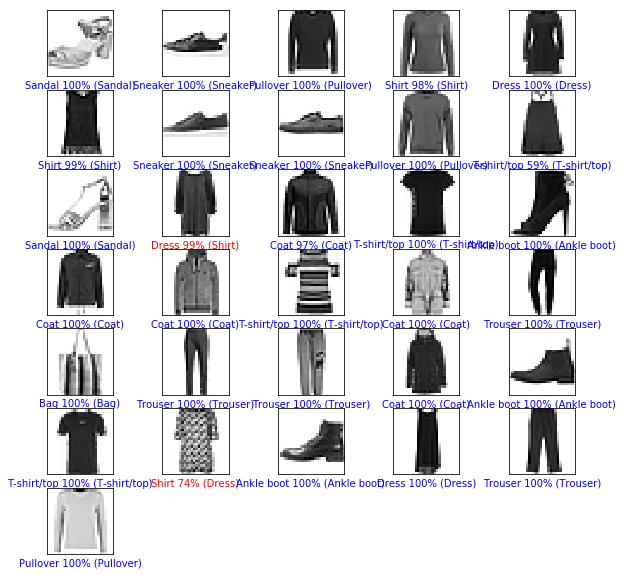

In [119]:
plt.figure(figsize=(10,10))
for i in range(31):
    plt.subplot(7,5,i+1)
    plot_image(i+1,predictions,test_labels,test_images)
    i+=1

### try different epochs

In [16]:
def test_accuracy(epoch):
    model.fit(train_dataset, epochs = epoch, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))
    test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
    return test_accuracy

In [36]:
import time
epoch_times = []
epoch_test_accuracys = []
epochs = range(1,11,3)
for epoch in epochs:
    start = time.time()
    epoch_test_accuracys.append(test_accuracy(epoch))
    end = time.time()
    epoch_times.append(end - start)
#test_accuracys = [test_accuracy(epoch) for epoch in epochs]

 403/1875 [=====>........................] - ETA: 5:32:16 - loss: 7.5604e-04 - acc: 1.00 - ETA: 1:51:22 - loss: 4.5953e-04 - acc: 1.00 - ETA: 1:07:14 - loss: 2.9576e-04 - acc: 1.00 - ETA: 48:17 - loss: 0.0029 - acc: 1.0000     - ETA: 37:45 - loss: 0.0078 - acc: 0.99 - ETA: 31:03 - loss: 0.0069 - acc: 0.99 - ETA: 26:24 - loss: 0.0061 - acc: 0.99 - ETA: 23:00 - loss: 0.0053 - acc: 0.99 - ETA: 20:24 - loss: 0.0346 - acc: 0.99 - ETA: 18:21 - loss: 0.0311 - acc: 0.99 - ETA: 16:42 - loss: 0.0282 - acc: 0.99 - ETA: 15:19 - loss: 0.0261 - acc: 0.99 - ETA: 14:10 - loss: 0.0241 - acc: 0.99 - ETA: 13:11 - loss: 0.0223 - acc: 0.99 - ETA: 12:20 - loss: 0.0208 - acc: 0.99 - ETA: 11:36 - loss: 0.0199 - acc: 0.99 - ETA: 10:57 - loss: 0.0191 - acc: 0.99 - ETA: 10:22 - loss: 0.0184 - acc: 0.99 - ETA: 9:51 - loss: 0.0176 - acc: 0.9983 - ETA: 9:24 - loss: 0.0168 - acc: 0.998 - ETA: 8:59 - loss: 0.0160 - acc: 0.998 - ETA: 8:36 - loss: 0.0155 - acc: 0.998 - ETA: 8:16 - loss: 0.0148 - acc: 0.998 - ETA: 7:57 

 815/1875 [============>.................] - ETA: 1:32 - loss: 0.0126 - acc: 0.996 - ETA: 1:32 - loss: 0.0125 - acc: 0.996 - ETA: 1:31 - loss: 0.0127 - acc: 0.996 - ETA: 1:31 - loss: 0.0128 - acc: 0.996 - ETA: 1:31 - loss: 0.0128 - acc: 0.996 - ETA: 1:30 - loss: 0.0127 - acc: 0.996 - ETA: 1:30 - loss: 0.0128 - acc: 0.996 - ETA: 1:30 - loss: 0.0128 - acc: 0.996 - ETA: 1:29 - loss: 0.0129 - acc: 0.996 - ETA: 1:29 - loss: 0.0130 - acc: 0.996 - ETA: 1:29 - loss: 0.0129 - acc: 0.996 - ETA: 1:29 - loss: 0.0129 - acc: 0.996 - ETA: 1:28 - loss: 0.0128 - acc: 0.996 - ETA: 1:28 - loss: 0.0128 - acc: 0.996 - ETA: 1:28 - loss: 0.0128 - acc: 0.996 - ETA: 1:27 - loss: 0.0128 - acc: 0.996 - ETA: 1:27 - loss: 0.0127 - acc: 0.996 - ETA: 1:27 - loss: 0.0127 - acc: 0.996 - ETA: 1:27 - loss: 0.0127 - acc: 0.996 - ETA: 1:26 - loss: 0.0129 - acc: 0.996 - ETA: 1:26 - loss: 0.0129 - acc: 0.996 - ETA: 1:26 - loss: 0.0129 - acc: 0.996 - ETA: 1:25 - loss: 0.0129 - acc: 0.996 - ETA: 1:25 - loss: 0.0129 - acc: 0.9

1243/1875 [==================>...........] - ETA: 53s - loss: 0.0142 - acc: 0.99 - ETA: 52s - loss: 0.0141 - acc: 0.99 - ETA: 52s - loss: 0.0141 - acc: 0.99 - ETA: 52s - loss: 0.0141 - acc: 0.99 - ETA: 52s - loss: 0.0140 - acc: 0.99 - ETA: 52s - loss: 0.0140 - acc: 0.99 - ETA: 52s - loss: 0.0142 - acc: 0.99 - ETA: 52s - loss: 0.0142 - acc: 0.99 - ETA: 52s - loss: 0.0141 - acc: 0.99 - ETA: 51s - loss: 0.0141 - acc: 0.99 - ETA: 51s - loss: 0.0141 - acc: 0.99 - ETA: 51s - loss: 0.0144 - acc: 0.99 - ETA: 51s - loss: 0.0144 - acc: 0.99 - ETA: 51s - loss: 0.0143 - acc: 0.99 - ETA: 51s - loss: 0.0143 - acc: 0.99 - ETA: 51s - loss: 0.0143 - acc: 0.99 - ETA: 51s - loss: 0.0142 - acc: 0.99 - ETA: 51s - loss: 0.0142 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 50s - loss: 0.0143 - acc: 0.99 - ETA: 

1673/1875 [=========================>....] - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0143 - acc: 0.99 - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0144 - acc: 0.99 - ETA: 28s - loss: 0.0143 - acc: 0.99 - ETA: 28s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0143 - acc: 0.99 - ETA: 27s - loss: 0.0142 - acc: 0.99 - ETA: 27s - loss: 0.0142 - acc: 0.99 - ETA: 27s - loss: 0.0142 - acc: 0.99 - ETA: 26s - loss: 0.0142 - acc: 0.99 - ETA: 26s - loss: 0.0142 - acc: 0.99 - ETA: 26s - loss: 0.0142 - acc: 0.99 - ETA: 26s - loss: 0.0141 - acc: 0.99 - ETA: 26s - loss: 0.0141 - acc: 0.99 - ETA: 

313/313 [==============================] - ETA: 9s - loss: 0.2480 - acc: 0.968 - ETA: 6s - loss: 0.2565 - acc: 0.960 - ETA: 5s - loss: 0.4902 - acc: 0.945 - ETA: 4s - loss: 0.5260 - acc: 0.934 - ETA: 5s - loss: 0.4820 - acc: 0.943 - ETA: 4s - loss: 0.4545 - acc: 0.940 - ETA: 4s - loss: 0.5163 - acc: 0.934 - ETA: 4s - loss: 0.5916 - acc: 0.926 - ETA: 4s - loss: 0.6001 - acc: 0.923 - ETA: 4s - loss: 0.6118 - acc: 0.923 - ETA: 4s - loss: 0.5759 - acc: 0.925 - ETA: 4s - loss: 0.5659 - acc: 0.926 - ETA: 4s - loss: 0.5706 - acc: 0.927 - ETA: 3s - loss: 0.5584 - acc: 0.926 - ETA: 3s - loss: 0.6089 - acc: 0.923 - ETA: 3s - loss: 0.5857 - acc: 0.924 - ETA: 3s - loss: 0.5789 - acc: 0.925 - ETA: 3s - loss: 0.5702 - acc: 0.926 - ETA: 3s - loss: 0.5781 - acc: 0.924 - ETA: 3s - loss: 0.6028 - acc: 0.921 - ETA: 3s - loss: 0.6146 - acc: 0.919 - ETA: 3s - loss: 0.6187 - acc: 0.919 - ETA: 3s - loss: 0.6184 - acc: 0.919 - ETA: 3s - loss: 0.6241 - acc: 0.917 - ETA: 3s - loss: 0.6138 - acc: 0.919 - ETA: 3s

 417/1875 [=====>........................] - ETA: 2:33 - loss: 0.3660 - acc: 0.937 - ETA: 1:37 - loss: 0.1237 - acc: 0.979 - ETA: 1:25 - loss: 0.0762 - acc: 0.987 - ETA: 1:20 - loss: 0.0567 - acc: 0.991 - ETA: 1:17 - loss: 0.0442 - acc: 0.993 - ETA: 1:14 - loss: 0.0373 - acc: 0.994 - ETA: 1:13 - loss: 0.0316 - acc: 0.995 - ETA: 1:12 - loss: 0.0303 - acc: 0.993 - ETA: 1:11 - loss: 0.0268 - acc: 0.994 - ETA: 1:11 - loss: 0.0243 - acc: 0.995 - ETA: 1:11 - loss: 0.0291 - acc: 0.994 - ETA: 1:10 - loss: 0.0266 - acc: 0.994 - ETA: 1:10 - loss: 0.0270 - acc: 0.993 - ETA: 1:09 - loss: 0.0250 - acc: 0.994 - ETA: 1:09 - loss: 0.0233 - acc: 0.994 - ETA: 1:08 - loss: 0.0252 - acc: 0.994 - ETA: 1:08 - loss: 0.0240 - acc: 0.994 - ETA: 1:08 - loss: 0.0241 - acc: 0.993 - ETA: 1:08 - loss: 0.0241 - acc: 0.993 - ETA: 1:07 - loss: 0.0250 - acc: 0.992 - ETA: 1:07 - loss: 0.0248 - acc: 0.992 - ETA: 1:07 - loss: 0.0290 - acc: 0.992 - ETA: 1:07 - loss: 0.0280 - acc: 0.992 - ETA: 1:07 - loss: 0.0300 - acc: 0.9

1875/1875 [==============================] - ETA: 5s - loss: 0.0145 - acc: 0.995 - ETA: 5s - loss: 0.0145 - acc: 0.995 - ETA: 5s - loss: 0.0145 - acc: 0.995 - ETA: 5s - loss: 0.0144 - acc: 0.995 - ETA: 5s - loss: 0.0144 - acc: 0.995 - ETA: 5s - loss: 0.0144 - acc: 0.995 - ETA: 5s - loss: 0.0144 - acc: 0.995 - ETA: 5s - loss: 0.0144 - acc: 0.995 - ETA: 5s - loss: 0.0144 - acc: 0.995 - ETA: 5s - loss: 0.0143 - acc: 0.995 - ETA: 5s - loss: 0.0143 - acc: 0.995 - ETA: 5s - loss: 0.0143 - acc: 0.995 - ETA: 5s - loss: 0.0143 - acc: 0.995 - ETA: 5s - loss: 0.0143 - acc: 0.995 - ETA: 4s - loss: 0.0143 - acc: 0.995 - ETA: 4s - loss: 0.0143 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0142 - acc: 0.995 - ETA: 4s - loss: 0.0141 - acc: 0.995 - ETA: 4s - loss: 0.0141 - acc: 0.995 - ETA: 

 416/1875 [=====>........................] - ETA: 2:33 - loss: 0.0059 - acc: 1.000 - ETA: 1:37 - loss: 0.0024 - acc: 1.000 - ETA: 1:25 - loss: 0.0015 - acc: 1.000 - ETA: 1:20 - loss: 0.0088 - acc: 0.995 - ETA: 1:17 - loss: 0.0412 - acc: 0.993 - ETA: 1:15 - loss: 0.0696 - acc: 0.991 - ETA: 1:14 - loss: 0.0591 - acc: 0.992 - ETA: 1:12 - loss: 0.0512 - acc: 0.993 - ETA: 1:12 - loss: 0.0529 - acc: 0.992 - ETA: 1:11 - loss: 0.0473 - acc: 0.993 - ETA: 1:10 - loss: 0.0429 - acc: 0.994 - ETA: 1:10 - loss: 0.0396 - acc: 0.994 - ETA: 1:09 - loss: 0.0367 - acc: 0.995 - ETA: 1:09 - loss: 0.0355 - acc: 0.994 - ETA: 1:09 - loss: 0.0331 - acc: 0.994 - ETA: 1:08 - loss: 0.0351 - acc: 0.994 - ETA: 1:08 - loss: 0.0343 - acc: 0.993 - ETA: 1:08 - loss: 0.0323 - acc: 0.993 - ETA: 1:08 - loss: 0.0306 - acc: 0.994 - ETA: 1:08 - loss: 0.0307 - acc: 0.993 - ETA: 1:07 - loss: 0.0292 - acc: 0.993 - ETA: 1:07 - loss: 0.0282 - acc: 0.994 - ETA: 1:07 - loss: 0.0270 - acc: 0.994 - ETA: 1:07 - loss: 0.0316 - acc: 0.9

313/313 [==============================] - ETA: 13s - loss: 0.9035 - acc: 0.90 - ETA: 6s - loss: 0.4782 - acc: 0.9375 - ETA: 6s - loss: 0.5470 - acc: 0.933 - ETA: 5s - loss: 0.5967 - acc: 0.929 - ETA: 5s - loss: 0.5446 - acc: 0.941 - ETA: 5s - loss: 0.5286 - acc: 0.943 - ETA: 5s - loss: 0.6067 - acc: 0.932 - ETA: 4s - loss: 0.6361 - acc: 0.922 - ETA: 4s - loss: 0.6117 - acc: 0.922 - ETA: 4s - loss: 0.5795 - acc: 0.923 - ETA: 4s - loss: 0.5704 - acc: 0.925 - ETA: 4s - loss: 0.5484 - acc: 0.925 - ETA: 4s - loss: 0.5456 - acc: 0.924 - ETA: 4s - loss: 0.6010 - acc: 0.920 - ETA: 4s - loss: 0.5785 - acc: 0.924 - ETA: 4s - loss: 0.5852 - acc: 0.924 - ETA: 4s - loss: 0.5826 - acc: 0.924 - ETA: 4s - loss: 0.5762 - acc: 0.925 - ETA: 3s - loss: 0.5789 - acc: 0.922 - ETA: 3s - loss: 0.5914 - acc: 0.922 - ETA: 3s - loss: 0.5916 - acc: 0.922 - ETA: 3s - loss: 0.5999 - acc: 0.922 - ETA: 3s - loss: 0.6062 - acc: 0.921 - ETA: 3s - loss: 0.6066 - acc: 0.921 - ETA: 3s - loss: 0.6083 - acc: 0.921 - ETA: 3

 414/1875 [=====>........................] - ETA: 2:31 - loss: 0.0729 - acc: 0.968 - ETA: 1:37 - loss: 0.0243 - acc: 0.989 - ETA: 1:25 - loss: 0.0152 - acc: 0.993 - ETA: 1:21 - loss: 0.0109 - acc: 0.995 - ETA: 1:18 - loss: 0.0085 - acc: 0.996 - ETA: 1:16 - loss: 0.0070 - acc: 0.997 - ETA: 1:15 - loss: 0.0059 - acc: 0.997 - ETA: 1:14 - loss: 0.0051 - acc: 0.997 - ETA: 1:14 - loss: 0.0045 - acc: 0.998 - ETA: 1:13 - loss: 0.0041 - acc: 0.998 - ETA: 1:12 - loss: 0.0037 - acc: 0.998 - ETA: 1:12 - loss: 0.0036 - acc: 0.998 - ETA: 1:11 - loss: 0.0034 - acc: 0.998 - ETA: 1:11 - loss: 0.0031 - acc: 0.998 - ETA: 1:10 - loss: 0.0031 - acc: 0.998 - ETA: 1:10 - loss: 0.0030 - acc: 0.999 - ETA: 1:10 - loss: 0.0029 - acc: 0.999 - ETA: 1:10 - loss: 0.0027 - acc: 0.999 - ETA: 1:09 - loss: 0.0092 - acc: 0.997 - ETA: 1:09 - loss: 0.0089 - acc: 0.997 - ETA: 1:09 - loss: 0.0085 - acc: 0.997 - ETA: 1:09 - loss: 0.0082 - acc: 0.997 - ETA: 1:09 - loss: 0.0087 - acc: 0.997 - ETA: 1:09 - loss: 0.0083 - acc: 0.9

1875/1875 [==============================] - ETA: 6s - loss: 0.0100 - acc: 0.997 - ETA: 6s - loss: 0.0100 - acc: 0.997 - ETA: 6s - loss: 0.0100 - acc: 0.997 - ETA: 6s - loss: 0.0100 - acc: 0.997 - ETA: 6s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 5s - loss: 0.0100 - acc: 0.997 - ETA: 4s - loss: 0.0100 - acc: 0.997 - ETA: 4s - loss: 0.0100 - acc: 0.997 - ETA: 4s - loss: 0.0100 - acc: 0.997 - ETA: 4s - loss: 0.0100 - acc: 0.997 - ETA: 4s - loss: 0.0100 - acc: 0.997 - ETA: 4s - loss: 0.0100 - acc: 0.997 - ETA: 

 414/1875 [=====>........................] - ETA: 2:29 - loss: 1.7583e-06 - acc: 1.000 - ETA: 1:35 - loss: 0.0015 - acc: 1.0000    - ETA: 1:25 - loss: 0.0089 - acc: 0.993 - ETA: 1:20 - loss: 0.0111 - acc: 0.991 - ETA: 1:17 - loss: 0.0087 - acc: 0.993 - ETA: 1:16 - loss: 0.0074 - acc: 0.994 - ETA: 1:14 - loss: 0.0065 - acc: 0.995 - ETA: 1:12 - loss: 0.0071 - acc: 0.995 - ETA: 1:12 - loss: 0.0063 - acc: 0.996 - ETA: 1:12 - loss: 0.0056 - acc: 0.996 - ETA: 1:11 - loss: 0.0249 - acc: 0.992 - ETA: 1:11 - loss: 0.0228 - acc: 0.993 - ETA: 1:10 - loss: 0.0211 - acc: 0.993 - ETA: 1:10 - loss: 0.0196 - acc: 0.994 - ETA: 1:09 - loss: 0.0238 - acc: 0.992 - ETA: 1:09 - loss: 0.0223 - acc: 0.992 - ETA: 1:09 - loss: 0.0210 - acc: 0.993 - ETA: 1:09 - loss: 0.0203 - acc: 0.993 - ETA: 1:09 - loss: 0.0193 - acc: 0.994 - ETA: 1:09 - loss: 0.0205 - acc: 0.993 - ETA: 1:08 - loss: 0.0217 - acc: 0.993 - ETA: 1:08 - loss: 0.0212 - acc: 0.993 - ETA: 1:08 - loss: 0.0203 - acc: 0.993 - ETA: 1:08 - loss: 0.0198 - 

1875/1875 [==============================] - ETA: 6s - loss: 0.0152 - acc: 0.995 - ETA: 6s - loss: 0.0152 - acc: 0.995 - ETA: 6s - loss: 0.0153 - acc: 0.995 - ETA: 6s - loss: 0.0152 - acc: 0.995 - ETA: 6s - loss: 0.0152 - acc: 0.995 - ETA: 6s - loss: 0.0152 - acc: 0.995 - ETA: 6s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0151 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0152 - acc: 0.995 - ETA: 5s - loss: 0.0153 - acc: 0.995 - ETA: 5s - loss: 0.0153 - acc: 0.995 - ETA: 5s - loss: 0.0153 - acc: 0.995 - ETA: 4s - loss: 0.0153 - acc: 0.995 - ETA: 4s - loss: 0.0152 - acc: 0.995 - ETA: 4s - loss: 0.0152 - acc: 0.995 - ETA: 4s - loss: 0.0152 - acc: 0.995 - ETA: 

 413/1875 [=====>........................] - ETA: 2:31 - loss: 0.0060 - acc: 1.000 - ETA: 1:36 - loss: 0.0028 - acc: 1.000 - ETA: 1:24 - loss: 0.0018 - acc: 1.000 - ETA: 1:27 - loss: 0.0016 - acc: 1.000 - ETA: 1:23 - loss: 0.0014 - acc: 1.000 - ETA: 1:20 - loss: 0.0012 - acc: 1.000 - ETA: 1:18 - loss: 9.8293e-04 - acc: 1.000 - ETA: 1:16 - loss: 9.3237e-04 - acc: 1.000 - ETA: 1:16 - loss: 8.5827e-04 - acc: 1.000 - ETA: 1:15 - loss: 0.0028 - acc: 0.9983    - ETA: 1:14 - loss: 0.0025 - acc: 0.998 - ETA: 1:14 - loss: 0.0023 - acc: 0.998 - ETA: 1:13 - loss: 0.0021 - acc: 0.998 - ETA: 1:12 - loss: 0.0019 - acc: 0.998 - ETA: 1:12 - loss: 0.0018 - acc: 0.998 - ETA: 1:12 - loss: 0.0018 - acc: 0.999 - ETA: 1:11 - loss: 0.0026 - acc: 0.998 - ETA: 1:11 - loss: 0.0024 - acc: 0.998 - ETA: 1:11 - loss: 0.0023 - acc: 0.998 - ETA: 1:10 - loss: 0.0022 - acc: 0.998 - ETA: 1:10 - loss: 0.0023 - acc: 0.998 - ETA: 1:10 - loss: 0.0022 - acc: 0.998 - ETA: 1:10 - loss: 0.0021 - acc: 0.998 - ETA: 1:10 - loss: 0

1875/1875 [==============================] - ETA: 6s - loss: 0.0115 - acc: 0.997 - ETA: 6s - loss: 0.0114 - acc: 0.997 - ETA: 6s - loss: 0.0114 - acc: 0.997 - ETA: 6s - loss: 0.0114 - acc: 0.997 - ETA: 6s - loss: 0.0114 - acc: 0.997 - ETA: 5s - loss: 0.0114 - acc: 0.997 - ETA: 5s - loss: 0.0114 - acc: 0.997 - ETA: 5s - loss: 0.0114 - acc: 0.997 - ETA: 5s - loss: 0.0114 - acc: 0.997 - ETA: 5s - loss: 0.0114 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 5s - loss: 0.0113 - acc: 0.997 - ETA: 4s - loss: 0.0113 - acc: 0.997 - ETA: 4s - loss: 0.0112 - acc: 0.997 - ETA: 4s - loss: 0.0114 - acc: 0.997 - ETA: 4s - loss: 0.0114 - acc: 0.997 - ETA: 4s - loss: 0.0113 - acc: 0.997 - ETA: 4s - loss: 0.0113 - acc: 0.997 - ETA: 4s - loss: 0.0113 - acc: 0.997 - ETA: 

 407/1875 [=====>........................] - ETA: 5:06:57 - loss: 2.0539e-05 - acc: 1.00 - ETA: 1:42:56 - loss: 8.2153e-05 - acc: 1.00 - ETA: 1:02:08 - loss: 0.0023 - acc: 1.0000   - ETA: 44:39 - loss: 0.0023 - acc: 1.0000 - ETA: 34:56 - loss: 0.0018 - acc: 1.00 - ETA: 28:45 - loss: 0.0015 - acc: 1.00 - ETA: 24:28 - loss: 0.0013 - acc: 1.00 - ETA: 21:20 - loss: 0.0047 - acc: 0.99 - ETA: 18:56 - loss: 0.0042 - acc: 0.99 - ETA: 17:02 - loss: 0.0043 - acc: 0.99 - ETA: 15:30 - loss: 0.0052 - acc: 0.99 - ETA: 14:14 - loss: 0.0077 - acc: 0.99 - ETA: 13:10 - loss: 0.0071 - acc: 0.99 - ETA: 12:16 - loss: 0.0067 - acc: 0.99 - ETA: 11:29 - loss: 0.0062 - acc: 0.99 - ETA: 10:48 - loss: 0.0126 - acc: 0.99 - ETA: 10:12 - loss: 0.0119 - acc: 0.99 - ETA: 9:40 - loss: 0.0112 - acc: 0.9964 - ETA: 9:12 - loss: 0.0110 - acc: 0.996 - ETA: 8:47 - loss: 0.0104 - acc: 0.996 - ETA: 8:24 - loss: 0.0099 - acc: 0.997 - ETA: 8:03 - loss: 0.0095 - acc: 0.997 - ETA: 7:44 - loss: 0.0093 - acc: 0.997 - ETA: 7:26 - lo

1875/1875 [==============================] - ETA: 8s - loss: 0.0118 - acc: 0.996 - ETA: 8s - loss: 0.0118 - acc: 0.996 - ETA: 8s - loss: 0.0117 - acc: 0.996 - ETA: 8s - loss: 0.0118 - acc: 0.996 - ETA: 8s - loss: 0.0118 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 7s - loss: 0.0119 - acc: 0.996 - ETA: 6s - loss: 0.0119 - acc: 0.996 - ETA: 6s - loss: 0.0119 - acc: 0.996 - ETA: 6s - loss: 0.0119 - acc: 0.996 - ETA: 6s - loss: 0.0119 - acc: 0.996 - ETA: 6s - loss: 0.0118 - acc: 0.996 - ETA: 6s - loss: 0.0118 - acc: 0.996 - ETA: 6s - loss: 0.0118 - acc: 0.996 - ETA: 6s - loss: 0.0118 - acc: 0.996 - ETA: 6s - loss: 0.0118 - acc: 0.996 - ETA: 

 408/1875 [=====>........................] - ETA: 2:46 - loss: 6.2061e-06 - acc: 1.000 - ETA: 1:42 - loss: 6.8203e-05 - acc: 1.000 - ETA: 1:30 - loss: 0.0033 - acc: 1.0000    - ETA: 1:24 - loss: 0.0025 - acc: 1.000 - ETA: 1:22 - loss: 0.0030 - acc: 1.000 - ETA: 1:19 - loss: 0.0132 - acc: 0.997 - ETA: 1:18 - loss: 0.0112 - acc: 0.997 - ETA: 1:17 - loss: 0.0097 - acc: 0.997 - ETA: 1:16 - loss: 0.0086 - acc: 0.998 - ETA: 1:15 - loss: 0.0081 - acc: 0.998 - ETA: 1:15 - loss: 0.0076 - acc: 0.998 - ETA: 1:14 - loss: 0.0070 - acc: 0.998 - ETA: 1:14 - loss: 0.0064 - acc: 0.998 - ETA: 1:14 - loss: 0.0059 - acc: 0.998 - ETA: 1:14 - loss: 0.0055 - acc: 0.998 - ETA: 1:14 - loss: 0.0052 - acc: 0.999 - ETA: 1:14 - loss: 0.0049 - acc: 0.999 - ETA: 1:13 - loss: 0.0047 - acc: 0.999 - ETA: 1:13 - loss: 0.0045 - acc: 0.999 - ETA: 1:13 - loss: 0.0080 - acc: 0.998 - ETA: 1:13 - loss: 0.0076 - acc: 0.998 - ETA: 1:12 - loss: 0.0073 - acc: 0.998 - ETA: 1:12 - loss: 0.0070 - acc: 0.998 - ETA: 1:12 - loss: 0.006

1875/1875 [==============================] - ETA: 6s - loss: 0.0140 - acc: 0.996 - ETA: 6s - loss: 0.0140 - acc: 0.996 - ETA: 6s - loss: 0.0139 - acc: 0.996 - ETA: 6s - loss: 0.0139 - acc: 0.996 - ETA: 6s - loss: 0.0139 - acc: 0.996 - ETA: 6s - loss: 0.0140 - acc: 0.996 - ETA: 6s - loss: 0.0140 - acc: 0.996 - ETA: 6s - loss: 0.0142 - acc: 0.996 - ETA: 6s - loss: 0.0141 - acc: 0.996 - ETA: 6s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0140 - acc: 0.996 - ETA: 5s - loss: 0.0140 - acc: 0.996 - ETA: 5s - loss: 0.0140 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0141 - acc: 0.996 - ETA: 5s - loss: 0.0140 - acc: 0.996 - ETA: 5s - loss: 0.0140 - acc: 0.996 - ETA: 4s - loss: 0.0140 - acc: 0.996 - ETA: 4s - loss: 0.0140 - acc: 0.996 - ETA: 

 413/1875 [=====>........................] - ETA: 2:51 - loss: 6.9762e-05 - acc: 1.000 - ETA: 1:48 - loss: 0.0149 - acc: 0.9896    - ETA: 1:33 - loss: 0.0091 - acc: 0.993 - ETA: 1:26 - loss: 0.0098 - acc: 0.991 - ETA: 1:22 - loss: 0.0076 - acc: 0.993 - ETA: 1:20 - loss: 0.0062 - acc: 0.994 - ETA: 1:18 - loss: 0.0053 - acc: 0.995 - ETA: 1:17 - loss: 0.0046 - acc: 0.995 - ETA: 1:16 - loss: 0.0040 - acc: 0.996 - ETA: 1:15 - loss: 0.0037 - acc: 0.996 - ETA: 1:14 - loss: 0.0033 - acc: 0.997 - ETA: 1:14 - loss: 0.0031 - acc: 0.997 - ETA: 1:13 - loss: 0.0030 - acc: 0.997 - ETA: 1:12 - loss: 0.0028 - acc: 0.997 - ETA: 1:12 - loss: 0.0026 - acc: 0.997 - ETA: 1:11 - loss: 0.0026 - acc: 0.998 - ETA: 1:11 - loss: 0.0025 - acc: 0.998 - ETA: 1:11 - loss: 0.0024 - acc: 0.998 - ETA: 1:11 - loss: 0.0022 - acc: 0.998 - ETA: 1:11 - loss: 0.0021 - acc: 0.998 - ETA: 1:10 - loss: 0.0022 - acc: 0.998 - ETA: 1:10 - loss: 0.0022 - acc: 0.998 - ETA: 1:10 - loss: 0.0022 - acc: 0.998 - ETA: 1:10 - loss: 0.0021 - 

1875/1875 [==============================] - ETA: 6s - loss: 0.0121 - acc: 0.996 - ETA: 6s - loss: 0.0121 - acc: 0.996 - ETA: 6s - loss: 0.0121 - acc: 0.996 - ETA: 6s - loss: 0.0122 - acc: 0.996 - ETA: 6s - loss: 0.0122 - acc: 0.996 - ETA: 6s - loss: 0.0122 - acc: 0.996 - ETA: 6s - loss: 0.0122 - acc: 0.996 - ETA: 6s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0121 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0122 - acc: 0.996 - ETA: 5s - loss: 0.0123 - acc: 0.996 - ETA: 5s - loss: 0.0123 - acc: 0.996 - ETA: 5s - loss: 0.0123 - acc: 0.996 - ETA: 5s - loss: 0.0123 - acc: 0.996 - ETA: 4s - loss: 0.0123 - acc: 0.996 - ETA: 4s - loss: 0.0123 - acc: 0.996 - ETA: 4s - loss: 0.0123 - acc: 0.996 - ETA: 4s - loss: 0.0123 - acc: 0.996 - ETA: 

 414/1875 [=====>........................] - ETA: 2:18 - loss: 8.9030e-06 - acc: 1.000 - ETA: 1:33 - loss: 0.0016 - acc: 1.0000    - ETA: 1:22 - loss: 0.0013 - acc: 1.000 - ETA: 1:18 - loss: 0.0051 - acc: 0.995 - ETA: 1:16 - loss: 0.0049 - acc: 0.996 - ETA: 1:14 - loss: 0.0048 - acc: 0.997 - ETA: 1:13 - loss: 0.0042 - acc: 0.997 - ETA: 1:13 - loss: 0.0040 - acc: 0.997 - ETA: 1:12 - loss: 0.0035 - acc: 0.998 - ETA: 1:11 - loss: 0.0032 - acc: 0.998 - ETA: 1:11 - loss: 0.0029 - acc: 0.998 - ETA: 1:11 - loss: 0.0026 - acc: 0.998 - ETA: 1:11 - loss: 0.0024 - acc: 0.998 - ETA: 1:11 - loss: 0.0065 - acc: 0.997 - ETA: 1:11 - loss: 0.0061 - acc: 0.997 - ETA: 1:10 - loss: 0.0057 - acc: 0.998 - ETA: 1:10 - loss: 0.0060 - acc: 0.998 - ETA: 1:09 - loss: 0.0089 - acc: 0.997 - ETA: 1:09 - loss: 0.0084 - acc: 0.997 - ETA: 1:09 - loss: 0.0080 - acc: 0.997 - ETA: 1:09 - loss: 0.0077 - acc: 0.997 - ETA: 1:09 - loss: 0.0073 - acc: 0.997 - ETA: 1:09 - loss: 0.0070 - acc: 0.997 - ETA: 1:10 - loss: 0.0069 - 

1875/1875 [==============================] - ETA: 6s - loss: 0.0110 - acc: 0.997 - ETA: 6s - loss: 0.0111 - acc: 0.997 - ETA: 6s - loss: 0.0111 - acc: 0.997 - ETA: 6s - loss: 0.0111 - acc: 0.997 - ETA: 6s - loss: 0.0111 - acc: 0.997 - ETA: 6s - loss: 0.0111 - acc: 0.997 - ETA: 6s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 5s - loss: 0.0110 - acc: 0.997 - ETA: 4s - loss: 0.0110 - acc: 0.997 - ETA: 4s - loss: 0.0110 - acc: 0.997 - ETA: 4s - loss: 0.0110 - acc: 0.997 - ETA: 4s - loss: 0.0110 - acc: 0.997 - ETA: 4s - loss: 0.0111 - acc: 0.997 - ETA: 

 409/1875 [=====>........................] - ETA: 2:38 - loss: 3.2111e-04 - acc: 1.000 - ETA: 1:44 - loss: 3.1637e-04 - acc: 1.000 - ETA: 1:31 - loss: 8.4870e-04 - acc: 1.000 - ETA: 1:25 - loss: 0.0024 - acc: 1.0000    - ETA: 1:21 - loss: 0.0025 - acc: 1.000 - ETA: 1:20 - loss: 0.0093 - acc: 0.997 - ETA: 1:20 - loss: 0.0152 - acc: 0.995 - ETA: 1:19 - loss: 0.0132 - acc: 0.995 - ETA: 1:19 - loss: 0.0119 - acc: 0.996 - ETA: 1:20 - loss: 0.0113 - acc: 0.996 - ETA: 1:19 - loss: 0.0116 - acc: 0.996 - ETA: 1:18 - loss: 0.0105 - acc: 0.997 - ETA: 1:17 - loss: 0.0097 - acc: 0.997 - ETA: 1:16 - loss: 0.0089 - acc: 0.997 - ETA: 1:16 - loss: 0.0084 - acc: 0.997 - ETA: 1:17 - loss: 0.0081 - acc: 0.997 - ETA: 1:17 - loss: 0.0139 - acc: 0.996 - ETA: 1:17 - loss: 0.0131 - acc: 0.997 - ETA: 1:16 - loss: 0.0123 - acc: 0.997 - ETA: 1:16 - loss: 0.0116 - acc: 0.997 - ETA: 1:15 - loss: 0.0110 - acc: 0.997 - ETA: 1:15 - loss: 0.0105 - acc: 0.997 - ETA: 1:14 - loss: 0.0106 - acc: 0.997 - ETA: 1:14 - loss: 0

1875/1875 [==============================] - ETA: 16s - loss: 0.0099 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0099 - acc: 0.99 - ETA: 15s - loss: 0.0099 - acc: 0.99 - ETA: 15s - loss: 0.0099 - acc: 0.99 - ETA: 15s - loss: 0.0099 - acc: 0.99 - ETA: 15s - loss: 0.0099 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 15s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0100 - acc: 0.99 - ETA: 14s - loss: 0.0099 - acc: 0.99 - ETA: 14s - loss: 0.0099 - acc: 0.99 - ETA: 14s - loss: 0.0099 - acc: 0.99 - ETA: 14s - loss: 0.0099 - acc: 0.99 - ETA: 14s - loss: 0.0099 - acc: 0.99 - ETA: 14s - loss: 0.0099 - acc: 0.99 - ETA: 

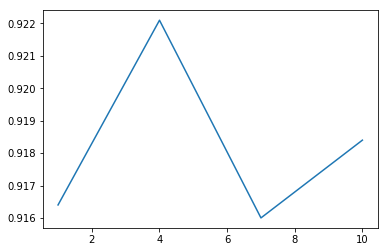

In [39]:
plt.plot(epochs,epoch_test_accuracys)

In [45]:
epoch_times

[85.00557279586792, 291.1590211391449, 501.6478703022003, 733.2951104640961]

### try different neurons

In [40]:
def modeling(num):
    model = keras.Sequential([
        keras.layers.Conv2D(32,(3,3), padding = 'same', activation = tf.nn.relu,
                           input_shape = (28,28,1)),
        keras.layers.MaxPooling2D((2,2), strides = 2),
        keras.layers.Conv2D(64,(3,3), padding = 'same', activation = tf.nn.relu,
                           input_shape = (28,28,1)),
        keras.layers.MaxPooling2D((2,2), strides = 2),
        keras.layers.Flatten(),
        keras.layers.Dense(num, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax),
        ])
    
    model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
            
    return model

#model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))
 #   test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))


In [ ]:
import time
times = []
num = range(10,512,50)
num_test_accuracys=[]    
for n in num:
    start = time.time()
    model = modeling(n)
    num_test_accuracys.append(test_accuracy(5))
    end = time.time()
    times.append(end-start)

Epoch 1/5
 410/1875 [=====>........................] - ETA: 6:09:07 - loss: 2.3168 - acc: 0.12 - ETA: 2:03:28 - loss: 2.2962 - acc: 0.12 - ETA: 1:02:01 - loss: 2.2622 - acc: 0.12 - ETA: 41:31 - loss: 2.2403 - acc: 0.1389 - ETA: 34:04 - loss: 2.2317 - acc: 0.14 - ETA: 28:57 - loss: 2.2310 - acc: 0.13 - ETA: 25:10 - loss: 2.2140 - acc: 0.14 - ETA: 22:17 - loss: 2.1947 - acc: 0.14 - ETA: 20:01 - loss: 2.1844 - acc: 0.14 - ETA: 18:11 - loss: 2.1683 - acc: 0.15 - ETA: 16:40 - loss: 2.1605 - acc: 0.15 - ETA: 15:23 - loss: 2.1568 - acc: 0.15 - ETA: 14:17 - loss: 2.1450 - acc: 0.15 - ETA: 13:21 - loss: 2.1266 - acc: 0.16 - ETA: 12:32 - loss: 2.1132 - acc: 0.16 - ETA: 11:49 - loss: 2.0931 - acc: 0.17 - ETA: 11:10 - loss: 2.0831 - acc: 0.17 - ETA: 10:36 - loss: 2.0652 - acc: 0.17 - ETA: 10:06 - loss: 2.0522 - acc: 0.18 - ETA: 9:38 - loss: 2.0446 - acc: 0.1875 - ETA: 9:13 - loss: 2.0279 - acc: 0.191 - ETA: 8:50 - loss: 2.0086 - acc: 0.200 - ETA: 8:29 - loss: 1.9966 - acc: 0.204 - ETA: 8:10 - loss

 428/1875 [=====>........................] - ETA: 2:14 - loss: 0.4031 - acc: 0.875 - ETA: 1:23 - loss: 0.6061 - acc: 0.781 - ETA: 1:14 - loss: 0.5333 - acc: 0.806 - ETA: 1:08 - loss: 0.6098 - acc: 0.776 - ETA: 1:05 - loss: 0.5443 - acc: 0.809 - ETA: 1:03 - loss: 0.5244 - acc: 0.821 - ETA: 1:01 - loss: 0.5048 - acc: 0.831 - ETA: 1:00 - loss: 0.5136 - acc: 0.829 - ETA: 59s - loss: 0.5368 - acc: 0.821 - ETA: 58s - loss: 0.5260 - acc: 0.82 - ETA: 58s - loss: 0.5267 - acc: 0.82 - ETA: 57s - loss: 0.5312 - acc: 0.82 - ETA: 56s - loss: 0.5192 - acc: 0.82 - ETA: 56s - loss: 0.5084 - acc: 0.82 - ETA: 55s - loss: 0.4990 - acc: 0.82 - ETA: 55s - loss: 0.4914 - acc: 0.82 - ETA: 55s - loss: 0.4867 - acc: 0.83 - ETA: 55s - loss: 0.4885 - acc: 0.83 - ETA: 55s - loss: 0.4891 - acc: 0.82 - ETA: 55s - loss: 0.4907 - acc: 0.82 - ETA: 55s - loss: 0.4869 - acc: 0.82 - ETA: 55s - loss: 0.4832 - acc: 0.82 - ETA: 54s - loss: 0.4828 - acc: 0.82 - ETA: 54s - loss: 0.4867 - acc: 0.82 - ETA: 54s - loss: 0.4957 - 

1875/1875 [==============================] - ETA: 4s - loss: 0.4152 - acc: 0.855 - ETA: 4s - loss: 0.4150 - acc: 0.855 - ETA: 4s - loss: 0.4148 - acc: 0.855 - ETA: 3s - loss: 0.4147 - acc: 0.855 - ETA: 3s - loss: 0.4150 - acc: 0.855 - ETA: 3s - loss: 0.4151 - acc: 0.855 - ETA: 3s - loss: 0.4151 - acc: 0.855 - ETA: 3s - loss: 0.4150 - acc: 0.855 - ETA: 3s - loss: 0.4150 - acc: 0.855 - ETA: 3s - loss: 0.4150 - acc: 0.855 - ETA: 3s - loss: 0.4151 - acc: 0.855 - ETA: 3s - loss: 0.4151 - acc: 0.855 - ETA: 3s - loss: 0.4149 - acc: 0.856 - ETA: 3s - loss: 0.4150 - acc: 0.856 - ETA: 3s - loss: 0.4150 - acc: 0.856 - ETA: 3s - loss: 0.4150 - acc: 0.856 - ETA: 3s - loss: 0.4148 - acc: 0.856 - ETA: 3s - loss: 0.4148 - acc: 0.856 - ETA: 3s - loss: 0.4148 - acc: 0.856 - ETA: 3s - loss: 0.4149 - acc: 0.856 - ETA: 3s - loss: 0.4149 - acc: 0.856 - ETA: 2s - loss: 0.4149 - acc: 0.856 - ETA: 2s - loss: 0.4148 - acc: 0.856 - ETA: 2s - loss: 0.4148 - acc: 0.856 - ETA: 2s - loss: 0.4148 - acc: 0.856 - ETA: 

 427/1875 [=====>........................] - ETA: 2:16 - loss: 0.2229 - acc: 0.937 - ETA: 1:19 - loss: 0.4277 - acc: 0.875 - ETA: 1:09 - loss: 0.4293 - acc: 0.868 - ETA: 1:06 - loss: 0.4008 - acc: 0.866 - ETA: 1:02 - loss: 0.3665 - acc: 0.864 - ETA: 1:00 - loss: 0.3521 - acc: 0.875 - ETA: 1:00 - loss: 0.3470 - acc: 0.875 - ETA: 1:01 - loss: 0.3246 - acc: 0.883 - ETA: 1:02 - loss: 0.3325 - acc: 0.880 - ETA: 1:02 - loss: 0.3171 - acc: 0.884 - ETA: 1:03 - loss: 0.3183 - acc: 0.885 - ETA: 1:02 - loss: 0.3169 - acc: 0.887 - ETA: 1:01 - loss: 0.3159 - acc: 0.888 - ETA: 1:00 - loss: 0.3145 - acc: 0.891 - ETA: 1:00 - loss: 0.3189 - acc: 0.886 - ETA: 59s - loss: 0.3115 - acc: 0.890 - ETA: 59s - loss: 0.3087 - acc: 0.89 - ETA: 59s - loss: 0.3076 - acc: 0.89 - ETA: 58s - loss: 0.3084 - acc: 0.89 - ETA: 57s - loss: 0.3053 - acc: 0.89 - ETA: 57s - loss: 0.2990 - acc: 0.89 - ETA: 57s - loss: 0.3047 - acc: 0.89 - ETA: 56s - loss: 0.3164 - acc: 0.89 - ETA: 56s - loss: 0.3129 - acc: 0.89 - ETA: 56s - l

1875/1875 [==============================] - ETA: 5s - loss: 0.3065 - acc: 0.892 - ETA: 5s - loss: 0.3064 - acc: 0.892 - ETA: 5s - loss: 0.3063 - acc: 0.892 - ETA: 5s - loss: 0.3062 - acc: 0.892 - ETA: 5s - loss: 0.3061 - acc: 0.892 - ETA: 5s - loss: 0.3061 - acc: 0.892 - ETA: 5s - loss: 0.3062 - acc: 0.892 - ETA: 5s - loss: 0.3065 - acc: 0.892 - ETA: 4s - loss: 0.3064 - acc: 0.892 - ETA: 4s - loss: 0.3065 - acc: 0.892 - ETA: 4s - loss: 0.3064 - acc: 0.892 - ETA: 4s - loss: 0.3063 - acc: 0.892 - ETA: 4s - loss: 0.3063 - acc: 0.892 - ETA: 4s - loss: 0.3064 - acc: 0.892 - ETA: 4s - loss: 0.3064 - acc: 0.892 - ETA: 4s - loss: 0.3063 - acc: 0.892 - ETA: 4s - loss: 0.3062 - acc: 0.892 - ETA: 4s - loss: 0.3064 - acc: 0.892 - ETA: 4s - loss: 0.3063 - acc: 0.892 - ETA: 4s - loss: 0.3063 - acc: 0.892 - ETA: 4s - loss: 0.3063 - acc: 0.892 - ETA: 4s - loss: 0.3062 - acc: 0.892 - ETA: 4s - loss: 0.3060 - acc: 0.892 - ETA: 4s - loss: 0.3060 - acc: 0.892 - ETA: 3s - loss: 0.3059 - acc: 0.892 - ETA: 

 407/1875 [=====>........................] - ETA: 5:49:15 - loss: 2.3048 - acc: 0.0000e+ - ETA: 1:56:50 - loss: 2.2581 - acc: 0.0938   - ETA: 1:10:22 - loss: 2.2101 - acc: 0.10 - ETA: 50:26 - loss: 2.1649 - acc: 0.1339 - ETA: 39:23 - loss: 2.1046 - acc: 0.18 - ETA: 32:20 - loss: 2.0208 - acc: 0.25 - ETA: 27:28 - loss: 1.9773 - acc: 0.26 - ETA: 23:53 - loss: 1.8876 - acc: 0.29 - ETA: 21:09 - loss: 1.8142 - acc: 0.32 - ETA: 18:59 - loss: 1.7490 - acc: 0.34 - ETA: 17:14 - loss: 1.6808 - acc: 0.36 - ETA: 15:48 - loss: 1.6117 - acc: 0.39 - ETA: 14:35 - loss: 1.5867 - acc: 0.40 - ETA: 13:33 - loss: 1.5514 - acc: 0.41 - ETA: 12:39 - loss: 1.5233 - acc: 0.42 - ETA: 11:53 - loss: 1.5075 - acc: 0.43 - ETA: 11:12 - loss: 1.4692 - acc: 0.44 - ETA: 10:36 - loss: 1.4645 - acc: 0.45 - ETA: 10:03 - loss: 1.4316 - acc: 0.46 - ETA: 9:34 - loss: 1.4222 - acc: 0.4720 - ETA: 9:08 - loss: 1.3963 - acc: 0.480 - ETA: 8:44 - loss: 1.3678 - acc: 0.493 - ETA: 8:23 - loss: 1.3449 - acc: 0.503 - ETA: 8:03 - loss: 

1875/1875 [==============================] - ETA: 6s - loss: 0.4173 - acc: 0.850 - ETA: 6s - loss: 0.4172 - acc: 0.850 - ETA: 6s - loss: 0.4169 - acc: 0.850 - ETA: 6s - loss: 0.4170 - acc: 0.850 - ETA: 6s - loss: 0.4169 - acc: 0.850 - ETA: 6s - loss: 0.4168 - acc: 0.850 - ETA: 6s - loss: 0.4167 - acc: 0.850 - ETA: 5s - loss: 0.4168 - acc: 0.850 - ETA: 5s - loss: 0.4167 - acc: 0.850 - ETA: 5s - loss: 0.4166 - acc: 0.850 - ETA: 5s - loss: 0.4165 - acc: 0.850 - ETA: 5s - loss: 0.4166 - acc: 0.850 - ETA: 5s - loss: 0.4166 - acc: 0.850 - ETA: 5s - loss: 0.4166 - acc: 0.850 - ETA: 5s - loss: 0.4166 - acc: 0.850 - ETA: 5s - loss: 0.4166 - acc: 0.850 - ETA: 5s - loss: 0.4165 - acc: 0.850 - ETA: 5s - loss: 0.4163 - acc: 0.850 - ETA: 5s - loss: 0.4160 - acc: 0.850 - ETA: 5s - loss: 0.4159 - acc: 0.850 - ETA: 5s - loss: 0.4158 - acc: 0.850 - ETA: 5s - loss: 0.4158 - acc: 0.850 - ETA: 4s - loss: 0.4157 - acc: 0.850 - ETA: 4s - loss: 0.4155 - acc: 0.851 - ETA: 4s - loss: 0.4153 - acc: 0.851 - ETA: 

 429/1875 [=====>........................] - ETA: 2:29 - loss: 0.4694 - acc: 0.812 - ETA: 1:25 - loss: 0.3091 - acc: 0.875 - ETA: 1:11 - loss: 0.2745 - acc: 0.875 - ETA: 1:05 - loss: 0.2374 - acc: 0.897 - ETA: 1:02 - loss: 0.2287 - acc: 0.902 - ETA: 59s - loss: 0.2157 - acc: 0.909 - ETA: 58s - loss: 0.2250 - acc: 0.90 - ETA: 57s - loss: 0.2319 - acc: 0.90 - ETA: 56s - loss: 0.2343 - acc: 0.90 - ETA: 56s - loss: 0.2526 - acc: 0.90 - ETA: 55s - loss: 0.2575 - acc: 0.90 - ETA: 55s - loss: 0.2535 - acc: 0.90 - ETA: 54s - loss: 0.2564 - acc: 0.90 - ETA: 54s - loss: 0.2555 - acc: 0.90 - ETA: 53s - loss: 0.2591 - acc: 0.90 - ETA: 53s - loss: 0.2706 - acc: 0.90 - ETA: 53s - loss: 0.2683 - acc: 0.90 - ETA: 53s - loss: 0.2730 - acc: 0.90 - ETA: 52s - loss: 0.2694 - acc: 0.90 - ETA: 52s - loss: 0.2627 - acc: 0.90 - ETA: 52s - loss: 0.2582 - acc: 0.90 - ETA: 52s - loss: 0.2566 - acc: 0.90 - ETA: 52s - loss: 0.2602 - acc: 0.90 - ETA: 51s - loss: 0.2617 - acc: 0.90 - ETA: 52s - loss: 0.2560 - acc: 0

1875/1875 [==============================] - ETA: 4s - loss: 0.2305 - acc: 0.916 - ETA: 4s - loss: 0.2305 - acc: 0.916 - ETA: 4s - loss: 0.2304 - acc: 0.916 - ETA: 4s - loss: 0.2303 - acc: 0.916 - ETA: 4s - loss: 0.2303 - acc: 0.916 - ETA: 4s - loss: 0.2302 - acc: 0.916 - ETA: 3s - loss: 0.2303 - acc: 0.916 - ETA: 3s - loss: 0.2302 - acc: 0.916 - ETA: 3s - loss: 0.2301 - acc: 0.916 - ETA: 3s - loss: 0.2301 - acc: 0.916 - ETA: 3s - loss: 0.2300 - acc: 0.916 - ETA: 3s - loss: 0.2301 - acc: 0.916 - ETA: 3s - loss: 0.2302 - acc: 0.916 - ETA: 3s - loss: 0.2300 - acc: 0.916 - ETA: 3s - loss: 0.2299 - acc: 0.916 - ETA: 3s - loss: 0.2298 - acc: 0.916 - ETA: 3s - loss: 0.2301 - acc: 0.916 - ETA: 3s - loss: 0.2300 - acc: 0.916 - ETA: 3s - loss: 0.2298 - acc: 0.916 - ETA: 3s - loss: 0.2297 - acc: 0.916 - ETA: 3s - loss: 0.2298 - acc: 0.916 - ETA: 3s - loss: 0.2297 - acc: 0.916 - ETA: 3s - loss: 0.2296 - acc: 0.916 - ETA: 3s - loss: 0.2295 - acc: 0.916 - ETA: 2s - loss: 0.2295 - acc: 0.916 - ETA: 

 429/1875 [=====>........................] - ETA: 2:23 - loss: 0.0400 - acc: 1.000 - ETA: 1:23 - loss: 0.0987 - acc: 0.968 - ETA: 1:10 - loss: 0.1838 - acc: 0.931 - ETA: 1:04 - loss: 0.1864 - acc: 0.928 - ETA: 1:02 - loss: 0.1874 - acc: 0.923 - ETA: 1:00 - loss: 0.2184 - acc: 0.917 - ETA: 58s - loss: 0.1989 - acc: 0.927 - ETA: 57s - loss: 0.2039 - acc: 0.92 - ETA: 56s - loss: 0.1959 - acc: 0.92 - ETA: 55s - loss: 0.1988 - acc: 0.92 - ETA: 54s - loss: 0.1982 - acc: 0.92 - ETA: 54s - loss: 0.1969 - acc: 0.92 - ETA: 54s - loss: 0.1910 - acc: 0.93 - ETA: 53s - loss: 0.1822 - acc: 0.93 - ETA: 53s - loss: 0.1805 - acc: 0.93 - ETA: 52s - loss: 0.1790 - acc: 0.93 - ETA: 52s - loss: 0.1804 - acc: 0.93 - ETA: 52s - loss: 0.1777 - acc: 0.93 - ETA: 52s - loss: 0.1789 - acc: 0.93 - ETA: 52s - loss: 0.1759 - acc: 0.93 - ETA: 52s - loss: 0.1714 - acc: 0.93 - ETA: 52s - loss: 0.1708 - acc: 0.93 - ETA: 52s - loss: 0.1758 - acc: 0.93 - ETA: 52s - loss: 0.1789 - acc: 0.93 - ETA: 51s - loss: 0.1739 - acc:

313/313 [==============================] - ETA: 32s - loss: 0.1404 - acc: 0.93 - ETA: 8s - loss: 0.1677 - acc: 0.9271 - ETA: 7s - loss: 0.1982 - acc: 0.923 - ETA: 6s - loss: 0.2159 - acc: 0.920 - ETA: 5s - loss: 0.1935 - acc: 0.928 - ETA: 5s - loss: 0.2130 - acc: 0.922 - ETA: 5s - loss: 0.2301 - acc: 0.917 - ETA: 4s - loss: 0.2590 - acc: 0.914 - ETA: 4s - loss: 0.2599 - acc: 0.909 - ETA: 4s - loss: 0.2485 - acc: 0.911 - ETA: 4s - loss: 0.2506 - acc: 0.912 - ETA: 4s - loss: 0.2401 - acc: 0.914 - ETA: 4s - loss: 0.2645 - acc: 0.911 - ETA: 4s - loss: 0.2667 - acc: 0.910 - ETA: 3s - loss: 0.2636 - acc: 0.910 - ETA: 3s - loss: 0.2627 - acc: 0.910 - ETA: 3s - loss: 0.2634 - acc: 0.911 - ETA: 3s - loss: 0.2680 - acc: 0.908 - ETA: 3s - loss: 0.2666 - acc: 0.909 - ETA: 3s - loss: 0.2634 - acc: 0.910 - ETA: 3s - loss: 0.2677 - acc: 0.910 - ETA: 3s - loss: 0.2668 - acc: 0.911 - ETA: 3s - loss: 0.2652 - acc: 0.910 - ETA: 3s - loss: 0.2678 - acc: 0.909 - ETA: 2s - loss: 0.2589 - acc: 0.911 - ETA: 2

 427/1875 [=====>........................] - ETA: 2:57 - loss: 0.3184 - acc: 0.906 - ETA: 1:37 - loss: 0.2312 - acc: 0.927 - ETA: 1:19 - loss: 0.2689 - acc: 0.906 - ETA: 1:13 - loss: 0.2725 - acc: 0.906 - ETA: 1:09 - loss: 0.2739 - acc: 0.909 - ETA: 1:06 - loss: 0.2464 - acc: 0.917 - ETA: 1:04 - loss: 0.2569 - acc: 0.915 - ETA: 1:03 - loss: 0.2499 - acc: 0.918 - ETA: 1:03 - loss: 0.2658 - acc: 0.915 - ETA: 1:03 - loss: 0.2672 - acc: 0.917 - ETA: 1:02 - loss: 0.2540 - acc: 0.922 - ETA: 1:01 - loss: 0.2634 - acc: 0.915 - ETA: 1:01 - loss: 0.2670 - acc: 0.911 - ETA: 1:00 - loss: 0.2624 - acc: 0.912 - ETA: 1:00 - loss: 0.2655 - acc: 0.908 - ETA: 59s - loss: 0.2713 - acc: 0.906 - ETA: 59s - loss: 0.2702 - acc: 0.90 - ETA: 59s - loss: 0.2750 - acc: 0.90 - ETA: 59s - loss: 0.2806 - acc: 0.90 - ETA: 58s - loss: 0.2850 - acc: 0.90 - ETA: 59s - loss: 0.2826 - acc: 0.90 - ETA: 59s - loss: 0.2811 - acc: 0.90 - ETA: 59s - loss: 0.2770 - acc: 0.90 - ETA: 58s - loss: 0.2747 - acc: 0.90 - ETA: 58s - l

1875/1875 [==============================] - ETA: 4s - loss: 0.2611 - acc: 0.906 - ETA: 4s - loss: 0.2611 - acc: 0.906 - ETA: 4s - loss: 0.2611 - acc: 0.906 - ETA: 4s - loss: 0.2612 - acc: 0.906 - ETA: 4s - loss: 0.2611 - acc: 0.906 - ETA: 4s - loss: 0.2610 - acc: 0.906 - ETA: 4s - loss: 0.2611 - acc: 0.906 - ETA: 4s - loss: 0.2610 - acc: 0.906 - ETA: 4s - loss: 0.2609 - acc: 0.906 - ETA: 4s - loss: 0.2610 - acc: 0.906 - ETA: 3s - loss: 0.2610 - acc: 0.906 - ETA: 3s - loss: 0.2610 - acc: 0.906 - ETA: 3s - loss: 0.2610 - acc: 0.906 - ETA: 3s - loss: 0.2610 - acc: 0.906 - ETA: 3s - loss: 0.2609 - acc: 0.906 - ETA: 3s - loss: 0.2608 - acc: 0.906 - ETA: 3s - loss: 0.2607 - acc: 0.906 - ETA: 3s - loss: 0.2608 - acc: 0.906 - ETA: 3s - loss: 0.2607 - acc: 0.906 - ETA: 3s - loss: 0.2607 - acc: 0.906 - ETA: 3s - loss: 0.2607 - acc: 0.906 - ETA: 3s - loss: 0.2606 - acc: 0.906 - ETA: 3s - loss: 0.2604 - acc: 0.906 - ETA: 3s - loss: 0.2604 - acc: 0.906 - ETA: 3s - loss: 0.2604 - acc: 0.906 - ETA: 

 429/1875 [=====>........................] - ETA: 2:14 - loss: 0.0827 - acc: 0.968 - ETA: 1:21 - loss: 0.2497 - acc: 0.927 - ETA: 1:12 - loss: 0.2407 - acc: 0.918 - ETA: 1:07 - loss: 0.2736 - acc: 0.897 - ETA: 1:04 - loss: 0.2550 - acc: 0.902 - ETA: 1:01 - loss: 0.2447 - acc: 0.903 - ETA: 1:00 - loss: 0.2393 - acc: 0.908 - ETA: 59s - loss: 0.2256 - acc: 0.914 - ETA: 58s - loss: 0.2153 - acc: 0.91 - ETA: 57s - loss: 0.2177 - acc: 0.91 - ETA: 57s - loss: 0.2096 - acc: 0.92 - ETA: 57s - loss: 0.2102 - acc: 0.91 - ETA: 56s - loss: 0.2146 - acc: 0.91 - ETA: 56s - loss: 0.2091 - acc: 0.92 - ETA: 55s - loss: 0.2141 - acc: 0.92 - ETA: 55s - loss: 0.2147 - acc: 0.92 - ETA: 55s - loss: 0.2258 - acc: 0.91 - ETA: 55s - loss: 0.2202 - acc: 0.91 - ETA: 55s - loss: 0.2166 - acc: 0.91 - ETA: 55s - loss: 0.2175 - acc: 0.91 - ETA: 55s - loss: 0.2097 - acc: 0.92 - ETA: 54s - loss: 0.2083 - acc: 0.92 - ETA: 54s - loss: 0.2086 - acc: 0.92 - ETA: 54s - loss: 0.2131 - acc: 0.92 - ETA: 54s - loss: 0.2136 - ac

1875/1875 [==============================] - ETA: 4s - loss: 0.1810 - acc: 0.932 - ETA: 4s - loss: 0.1810 - acc: 0.932 - ETA: 4s - loss: 0.1809 - acc: 0.932 - ETA: 4s - loss: 0.1809 - acc: 0.932 - ETA: 4s - loss: 0.1810 - acc: 0.932 - ETA: 4s - loss: 0.1809 - acc: 0.932 - ETA: 4s - loss: 0.1808 - acc: 0.932 - ETA: 4s - loss: 0.1807 - acc: 0.932 - ETA: 4s - loss: 0.1807 - acc: 0.932 - ETA: 3s - loss: 0.1808 - acc: 0.932 - ETA: 3s - loss: 0.1807 - acc: 0.932 - ETA: 3s - loss: 0.1807 - acc: 0.932 - ETA: 3s - loss: 0.1808 - acc: 0.932 - ETA: 3s - loss: 0.1807 - acc: 0.932 - ETA: 3s - loss: 0.1811 - acc: 0.932 - ETA: 3s - loss: 0.1809 - acc: 0.932 - ETA: 3s - loss: 0.1809 - acc: 0.932 - ETA: 3s - loss: 0.1810 - acc: 0.932 - ETA: 3s - loss: 0.1811 - acc: 0.932 - ETA: 3s - loss: 0.1811 - acc: 0.932 - ETA: 3s - loss: 0.1811 - acc: 0.932 - ETA: 3s - loss: 0.1813 - acc: 0.932 - ETA: 3s - loss: 0.1813 - acc: 0.932 - ETA: 3s - loss: 0.1813 - acc: 0.932 - ETA: 3s - loss: 0.1812 - acc: 0.932 - ETA: 

 407/1875 [=====>........................] - ETA: 5:58:17 - loss: 2.3116 - acc: 0.09 - ETA: 1:59:53 - loss: 2.2266 - acc: 0.27 - ETA: 1:12:13 - loss: 2.1612 - acc: 0.28 - ETA: 51:47 - loss: 2.0714 - acc: 0.3348 - ETA: 40:26 - loss: 1.9752 - acc: 0.36 - ETA: 33:13 - loss: 1.8877 - acc: 0.39 - ETA: 28:12 - loss: 1.8040 - acc: 0.41 - ETA: 24:32 - loss: 1.7127 - acc: 0.45 - ETA: 21:44 - loss: 1.6154 - acc: 0.48 - ETA: 19:31 - loss: 1.5386 - acc: 0.51 - ETA: 17:43 - loss: 1.4936 - acc: 0.52 - ETA: 16:14 - loss: 1.4526 - acc: 0.53 - ETA: 15:00 - loss: 1.4171 - acc: 0.53 - ETA: 13:56 - loss: 1.3984 - acc: 0.53 - ETA: 13:01 - loss: 1.3713 - acc: 0.54 - ETA: 12:13 - loss: 1.3545 - acc: 0.55 - ETA: 11:31 - loss: 1.3288 - acc: 0.55 - ETA: 10:54 - loss: 1.3110 - acc: 0.55 - ETA: 10:21 - loss: 1.2902 - acc: 0.56 - ETA: 9:51 - loss: 1.2648 - acc: 0.5721 - ETA: 9:24 - loss: 1.2301 - acc: 0.585 - ETA: 9:00 - loss: 1.2126 - acc: 0.588 - ETA: 8:38 - loss: 1.1927 - acc: 0.593 - ETA: 8:18 - loss: 1.1694 -

1875/1875 [==============================] - ETA: 7s - loss: 0.4052 - acc: 0.853 - ETA: 7s - loss: 0.4051 - acc: 0.854 - ETA: 6s - loss: 0.4050 - acc: 0.854 - ETA: 6s - loss: 0.4048 - acc: 0.854 - ETA: 6s - loss: 0.4045 - acc: 0.854 - ETA: 6s - loss: 0.4041 - acc: 0.854 - ETA: 6s - loss: 0.4041 - acc: 0.854 - ETA: 6s - loss: 0.4041 - acc: 0.854 - ETA: 6s - loss: 0.4040 - acc: 0.854 - ETA: 6s - loss: 0.4039 - acc: 0.854 - ETA: 6s - loss: 0.4038 - acc: 0.854 - ETA: 6s - loss: 0.4036 - acc: 0.854 - ETA: 6s - loss: 0.4034 - acc: 0.854 - ETA: 6s - loss: 0.4031 - acc: 0.854 - ETA: 6s - loss: 0.4031 - acc: 0.854 - ETA: 5s - loss: 0.4029 - acc: 0.854 - ETA: 5s - loss: 0.4029 - acc: 0.854 - ETA: 5s - loss: 0.4027 - acc: 0.854 - ETA: 5s - loss: 0.4026 - acc: 0.854 - ETA: 5s - loss: 0.4024 - acc: 0.854 - ETA: 5s - loss: 0.4024 - acc: 0.854 - ETA: 5s - loss: 0.4023 - acc: 0.854 - ETA: 5s - loss: 0.4022 - acc: 0.854 - ETA: 5s - loss: 0.4019 - acc: 0.855 - ETA: 5s - loss: 0.4017 - acc: 0.855 - ETA: 

 427/1875 [=====>........................] - ETA: 2:27 - loss: 0.1108 - acc: 0.937 - ETA: 1:26 - loss: 0.2177 - acc: 0.906 - ETA: 1:13 - loss: 0.2159 - acc: 0.918 - ETA: 1:08 - loss: 0.2047 - acc: 0.924 - ETA: 1:05 - loss: 0.1808 - acc: 0.930 - ETA: 1:04 - loss: 0.1806 - acc: 0.931 - ETA: 1:04 - loss: 0.2070 - acc: 0.918 - ETA: 1:03 - loss: 0.1930 - acc: 0.925 - ETA: 1:02 - loss: 0.1977 - acc: 0.924 - ETA: 1:01 - loss: 0.2023 - acc: 0.924 - ETA: 1:02 - loss: 0.1989 - acc: 0.924 - ETA: 1:01 - loss: 0.1925 - acc: 0.928 - ETA: 1:01 - loss: 0.1989 - acc: 0.927 - ETA: 1:01 - loss: 0.2055 - acc: 0.924 - ETA: 1:01 - loss: 0.2117 - acc: 0.920 - ETA: 1:00 - loss: 0.2140 - acc: 0.918 - ETA: 1:00 - loss: 0.2083 - acc: 0.919 - ETA: 1:00 - loss: 0.2055 - acc: 0.921 - ETA: 59s - loss: 0.2075 - acc: 0.920 - ETA: 59s - loss: 0.2060 - acc: 0.92 - ETA: 59s - loss: 0.2066 - acc: 0.92 - ETA: 59s - loss: 0.2069 - acc: 0.92 - ETA: 59s - loss: 0.2042 - acc: 0.92 - ETA: 58s - loss: 0.2031 - acc: 0.92 - ETA: 5

1875/1875 [==============================] - ETA: 4s - loss: 0.2081 - acc: 0.923 - ETA: 4s - loss: 0.2080 - acc: 0.923 - ETA: 4s - loss: 0.2081 - acc: 0.923 - ETA: 4s - loss: 0.2080 - acc: 0.923 - ETA: 4s - loss: 0.2081 - acc: 0.923 - ETA: 4s - loss: 0.2083 - acc: 0.923 - ETA: 4s - loss: 0.2082 - acc: 0.923 - ETA: 4s - loss: 0.2081 - acc: 0.923 - ETA: 4s - loss: 0.2083 - acc: 0.923 - ETA: 4s - loss: 0.2083 - acc: 0.923 - ETA: 4s - loss: 0.2083 - acc: 0.923 - ETA: 4s - loss: 0.2083 - acc: 0.923 - ETA: 4s - loss: 0.2082 - acc: 0.923 - ETA: 3s - loss: 0.2083 - acc: 0.923 - ETA: 3s - loss: 0.2084 - acc: 0.923 - ETA: 3s - loss: 0.2083 - acc: 0.923 - ETA: 3s - loss: 0.2082 - acc: 0.923 - ETA: 3s - loss: 0.2081 - acc: 0.923 - ETA: 3s - loss: 0.2081 - acc: 0.923 - ETA: 3s - loss: 0.2081 - acc: 0.923 - ETA: 3s - loss: 0.2081 - acc: 0.923 - ETA: 3s - loss: 0.2081 - acc: 0.923 - ETA: 3s - loss: 0.2080 - acc: 0.923 - ETA: 3s - loss: 0.2083 - acc: 0.923 - ETA: 3s - loss: 0.2082 - acc: 0.923 - ETA: 

 426/1875 [=====>........................] - ETA: 2:20 - loss: 0.2836 - acc: 0.875 - ETA: 1:27 - loss: 0.2641 - acc: 0.906 - ETA: 1:16 - loss: 0.1760 - acc: 0.937 - ETA: 1:09 - loss: 0.2449 - acc: 0.928 - ETA: 1:06 - loss: 0.2620 - acc: 0.923 - ETA: 1:04 - loss: 0.2363 - acc: 0.929 - ETA: 1:02 - loss: 0.2303 - acc: 0.930 - ETA: 1:01 - loss: 0.2338 - acc: 0.925 - ETA: 1:01 - loss: 0.2140 - acc: 0.932 - ETA: 1:00 - loss: 0.2031 - acc: 0.934 - ETA: 1:00 - loss: 0.2031 - acc: 0.936 - ETA: 59s - loss: 0.1948 - acc: 0.937 - ETA: 58s - loss: 0.1894 - acc: 0.93 - ETA: 58s - loss: 0.1890 - acc: 0.93 - ETA: 58s - loss: 0.1830 - acc: 0.93 - ETA: 58s - loss: 0.1823 - acc: 0.93 - ETA: 58s - loss: 0.1782 - acc: 0.93 - ETA: 57s - loss: 0.1761 - acc: 0.94 - ETA: 57s - loss: 0.1745 - acc: 0.94 - ETA: 57s - loss: 0.1719 - acc: 0.94 - ETA: 57s - loss: 0.1698 - acc: 0.94 - ETA: 57s - loss: 0.1681 - acc: 0.94 - ETA: 57s - loss: 0.1668 - acc: 0.94 - ETA: 57s - loss: 0.1679 - acc: 0.94 - ETA: 56s - loss: 0.1

313/313 [==============================] - ETA: 32s - loss: 0.1431 - acc: 0.96 - ETA: 8s - loss: 0.1594 - acc: 0.9479 - ETA: 6s - loss: 0.1833 - acc: 0.928 - ETA: 5s - loss: 0.1754 - acc: 0.929 - ETA: 5s - loss: 0.1715 - acc: 0.929 - ETA: 5s - loss: 0.1846 - acc: 0.926 - ETA: 5s - loss: 0.2212 - acc: 0.920 - ETA: 4s - loss: 0.2381 - acc: 0.918 - ETA: 4s - loss: 0.2382 - acc: 0.918 - ETA: 4s - loss: 0.2289 - acc: 0.921 - ETA: 4s - loss: 0.2211 - acc: 0.923 - ETA: 4s - loss: 0.2179 - acc: 0.925 - ETA: 4s - loss: 0.2401 - acc: 0.920 - ETA: 4s - loss: 0.2430 - acc: 0.918 - ETA: 3s - loss: 0.2375 - acc: 0.920 - ETA: 3s - loss: 0.2338 - acc: 0.920 - ETA: 3s - loss: 0.2373 - acc: 0.920 - ETA: 3s - loss: 0.2363 - acc: 0.921 - ETA: 3s - loss: 0.2444 - acc: 0.918 - ETA: 3s - loss: 0.2419 - acc: 0.918 - ETA: 3s - loss: 0.2445 - acc: 0.918 - ETA: 3s - loss: 0.2463 - acc: 0.918 - ETA: 3s - loss: 0.2449 - acc: 0.917 - ETA: 3s - loss: 0.2435 - acc: 0.919 - ETA: 2s - loss: 0.2406 - acc: 0.918 - ETA: 2

 427/1875 [=====>........................] - ETA: 2:29 - loss: 0.2163 - acc: 0.937 - ETA: 1:30 - loss: 0.3560 - acc: 0.875 - ETA: 1:17 - loss: 0.3638 - acc: 0.881 - ETA: 1:11 - loss: 0.3226 - acc: 0.892 - ETA: 1:09 - loss: 0.2886 - acc: 0.906 - ETA: 1:07 - loss: 0.2880 - acc: 0.906 - ETA: 1:06 - loss: 0.2898 - acc: 0.908 - ETA: 1:05 - loss: 0.2835 - acc: 0.910 - ETA: 1:03 - loss: 0.2752 - acc: 0.913 - ETA: 1:03 - loss: 0.2872 - acc: 0.904 - ETA: 1:02 - loss: 0.2862 - acc: 0.904 - ETA: 1:02 - loss: 0.2860 - acc: 0.903 - ETA: 1:01 - loss: 0.2791 - acc: 0.906 - ETA: 1:01 - loss: 0.2690 - acc: 0.907 - ETA: 1:01 - loss: 0.2807 - acc: 0.905 - ETA: 1:01 - loss: 0.2840 - acc: 0.902 - ETA: 1:00 - loss: 0.2874 - acc: 0.899 - ETA: 1:00 - loss: 0.2954 - acc: 0.895 - ETA: 1:00 - loss: 0.3005 - acc: 0.893 - ETA: 1:00 - loss: 0.2930 - acc: 0.895 - ETA: 1:00 - loss: 0.2885 - acc: 0.897 - ETA: 1:00 - loss: 0.2830 - acc: 0.900 - ETA: 59s - loss: 0.2830 - acc: 0.898 - ETA: 59s - loss: 0.2817 - acc: 0.89 

1875/1875 [==============================] - ETA: 4s - loss: 0.2528 - acc: 0.907 - ETA: 4s - loss: 0.2527 - acc: 0.907 - ETA: 4s - loss: 0.2527 - acc: 0.907 - ETA: 4s - loss: 0.2525 - acc: 0.907 - ETA: 4s - loss: 0.2524 - acc: 0.907 - ETA: 4s - loss: 0.2524 - acc: 0.907 - ETA: 4s - loss: 0.2525 - acc: 0.907 - ETA: 4s - loss: 0.2526 - acc: 0.907 - ETA: 4s - loss: 0.2526 - acc: 0.907 - ETA: 4s - loss: 0.2525 - acc: 0.907 - ETA: 4s - loss: 0.2525 - acc: 0.907 - ETA: 4s - loss: 0.2525 - acc: 0.907 - ETA: 4s - loss: 0.2524 - acc: 0.907 - ETA: 4s - loss: 0.2524 - acc: 0.907 - ETA: 4s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2523 - acc: 0.907 - ETA: 3s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2523 - acc: 0.907 - ETA: 3s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2523 - acc: 0.907 - ETA: 3s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2524 - acc: 0.907 - ETA: 3s - loss: 0.2525 - acc: 0.907 - ETA: 

 427/1875 [=====>........................] - ETA: 2:16 - loss: 0.0966 - acc: 0.968 - ETA: 1:28 - loss: 0.1002 - acc: 0.968 - ETA: 1:16 - loss: 0.1671 - acc: 0.950 - ETA: 1:10 - loss: 0.1510 - acc: 0.946 - ETA: 1:07 - loss: 0.1547 - acc: 0.951 - ETA: 1:06 - loss: 0.1458 - acc: 0.954 - ETA: 1:04 - loss: 0.1451 - acc: 0.954 - ETA: 1:03 - loss: 0.1375 - acc: 0.958 - ETA: 1:02 - loss: 0.1381 - acc: 0.959 - ETA: 1:02 - loss: 0.1351 - acc: 0.958 - ETA: 1:02 - loss: 0.1451 - acc: 0.952 - ETA: 1:02 - loss: 0.1549 - acc: 0.949 - ETA: 1:01 - loss: 0.1503 - acc: 0.952 - ETA: 1:01 - loss: 0.1487 - acc: 0.951 - ETA: 1:01 - loss: 0.1513 - acc: 0.951 - ETA: 1:00 - loss: 0.1576 - acc: 0.946 - ETA: 1:00 - loss: 0.1557 - acc: 0.947 - ETA: 1:00 - loss: 0.1688 - acc: 0.942 - ETA: 59s - loss: 0.1689 - acc: 0.941 - ETA: 59s - loss: 0.1700 - acc: 0.93 - ETA: 59s - loss: 0.1724 - acc: 0.93 - ETA: 59s - loss: 0.1716 - acc: 0.93 - ETA: 59s - loss: 0.1680 - acc: 0.93 - ETA: 59s - loss: 0.1646 - acc: 0.94 - ETA: 5

1875/1875 [==============================] - ETA: 4s - loss: 0.1726 - acc: 0.935 - ETA: 4s - loss: 0.1726 - acc: 0.935 - ETA: 4s - loss: 0.1726 - acc: 0.935 - ETA: 4s - loss: 0.1726 - acc: 0.935 - ETA: 4s - loss: 0.1727 - acc: 0.935 - ETA: 4s - loss: 0.1727 - acc: 0.935 - ETA: 4s - loss: 0.1728 - acc: 0.935 - ETA: 4s - loss: 0.1727 - acc: 0.935 - ETA: 4s - loss: 0.1728 - acc: 0.935 - ETA: 4s - loss: 0.1727 - acc: 0.935 - ETA: 4s - loss: 0.1727 - acc: 0.935 - ETA: 4s - loss: 0.1726 - acc: 0.935 - ETA: 4s - loss: 0.1726 - acc: 0.935 - ETA: 4s - loss: 0.1725 - acc: 0.935 - ETA: 4s - loss: 0.1724 - acc: 0.935 - ETA: 4s - loss: 0.1723 - acc: 0.935 - ETA: 3s - loss: 0.1724 - acc: 0.935 - ETA: 3s - loss: 0.1724 - acc: 0.935 - ETA: 3s - loss: 0.1723 - acc: 0.935 - ETA: 3s - loss: 0.1722 - acc: 0.935 - ETA: 3s - loss: 0.1722 - acc: 0.935 - ETA: 3s - loss: 0.1721 - acc: 0.935 - ETA: 3s - loss: 0.1721 - acc: 0.935 - ETA: 3s - loss: 0.1721 - acc: 0.935 - ETA: 3s - loss: 0.1722 - acc: 0.935 - ETA: 

 407/1875 [=====>........................] - ETA: 5:53:01 - loss: 2.2994 - acc: 0.06 - ETA: 1:58:11 - loss: 2.2000 - acc: 0.23 - ETA: 1:11:12 - loss: 2.1226 - acc: 0.27 - ETA: 51:04 - loss: 2.0043 - acc: 0.3571 - ETA: 39:53 - loss: 1.8962 - acc: 0.38 - ETA: 32:46 - loss: 1.7926 - acc: 0.41 - ETA: 27:51 - loss: 1.6943 - acc: 0.43 - ETA: 24:14 - loss: 1.5822 - acc: 0.47 - ETA: 21:28 - loss: 1.5298 - acc: 0.48 - ETA: 19:17 - loss: 1.4884 - acc: 0.49 - ETA: 17:32 - loss: 1.4470 - acc: 0.50 - ETA: 16:04 - loss: 1.4150 - acc: 0.51 - ETA: 14:51 - loss: 1.3972 - acc: 0.51 - ETA: 13:48 - loss: 1.3543 - acc: 0.53 - ETA: 12:54 - loss: 1.3198 - acc: 0.54 - ETA: 12:07 - loss: 1.2830 - acc: 0.55 - ETA: 11:25 - loss: 1.2507 - acc: 0.56 - ETA: 10:49 - loss: 1.2241 - acc: 0.57 - ETA: 10:17 - loss: 1.1939 - acc: 0.58 - ETA: 9:47 - loss: 1.1763 - acc: 0.5897 - ETA: 9:21 - loss: 1.1545 - acc: 0.594 - ETA: 8:57 - loss: 1.1311 - acc: 0.602 - ETA: 8:35 - loss: 1.1125 - acc: 0.608 - ETA: 8:15 - loss: 1.0990 -

1875/1875 [==============================] - ETA: 7s - loss: 0.3890 - acc: 0.859 - ETA: 7s - loss: 0.3888 - acc: 0.859 - ETA: 7s - loss: 0.3888 - acc: 0.859 - ETA: 7s - loss: 0.3886 - acc: 0.859 - ETA: 7s - loss: 0.3885 - acc: 0.859 - ETA: 7s - loss: 0.3883 - acc: 0.859 - ETA: 7s - loss: 0.3881 - acc: 0.859 - ETA: 6s - loss: 0.3879 - acc: 0.859 - ETA: 6s - loss: 0.3877 - acc: 0.859 - ETA: 6s - loss: 0.3878 - acc: 0.859 - ETA: 6s - loss: 0.3876 - acc: 0.859 - ETA: 6s - loss: 0.3877 - acc: 0.859 - ETA: 6s - loss: 0.3875 - acc: 0.859 - ETA: 6s - loss: 0.3873 - acc: 0.859 - ETA: 6s - loss: 0.3872 - acc: 0.859 - ETA: 6s - loss: 0.3872 - acc: 0.860 - ETA: 6s - loss: 0.3871 - acc: 0.860 - ETA: 6s - loss: 0.3870 - acc: 0.860 - ETA: 6s - loss: 0.3868 - acc: 0.860 - ETA: 5s - loss: 0.3866 - acc: 0.860 - ETA: 5s - loss: 0.3865 - acc: 0.860 - ETA: 5s - loss: 0.3865 - acc: 0.860 - ETA: 5s - loss: 0.3863 - acc: 0.860 - ETA: 5s - loss: 0.3864 - acc: 0.860 - ETA: 5s - loss: 0.3866 - acc: 0.860 - ETA: 

 425/1875 [=====>........................] - ETA: 2:48 - loss: 0.0785 - acc: 0.968 - ETA: 1:35 - loss: 0.2380 - acc: 0.895 - ETA: 1:21 - loss: 0.2855 - acc: 0.887 - ETA: 1:15 - loss: 0.3031 - acc: 0.892 - ETA: 1:12 - loss: 0.2919 - acc: 0.895 - ETA: 1:10 - loss: 0.2796 - acc: 0.892 - ETA: 1:08 - loss: 0.2536 - acc: 0.901 - ETA: 1:07 - loss: 0.2545 - acc: 0.906 - ETA: 1:06 - loss: 0.2442 - acc: 0.908 - ETA: 1:05 - loss: 0.2478 - acc: 0.911 - ETA: 1:04 - loss: 0.2367 - acc: 0.913 - ETA: 1:04 - loss: 0.2322 - acc: 0.914 - ETA: 1:03 - loss: 0.2238 - acc: 0.918 - ETA: 1:03 - loss: 0.2218 - acc: 0.921 - ETA: 1:03 - loss: 0.2218 - acc: 0.920 - ETA: 1:03 - loss: 0.2214 - acc: 0.922 - ETA: 1:02 - loss: 0.2313 - acc: 0.923 - ETA: 1:02 - loss: 0.2359 - acc: 0.921 - ETA: 1:02 - loss: 0.2473 - acc: 0.916 - ETA: 1:02 - loss: 0.2511 - acc: 0.911 - ETA: 1:01 - loss: 0.2479 - acc: 0.912 - ETA: 1:01 - loss: 0.2540 - acc: 0.909 - ETA: 1:01 - loss: 0.2508 - acc: 0.909 - ETA: 1:01 - loss: 0.2457 - acc: 0.9

1875/1875 [==============================] - ETA: 5s - loss: 0.2043 - acc: 0.924 - ETA: 5s - loss: 0.2044 - acc: 0.924 - ETA: 5s - loss: 0.2044 - acc: 0.924 - ETA: 5s - loss: 0.2043 - acc: 0.924 - ETA: 4s - loss: 0.2043 - acc: 0.924 - ETA: 4s - loss: 0.2042 - acc: 0.924 - ETA: 4s - loss: 0.2043 - acc: 0.924 - ETA: 4s - loss: 0.2043 - acc: 0.924 - ETA: 4s - loss: 0.2043 - acc: 0.924 - ETA: 4s - loss: 0.2043 - acc: 0.924 - ETA: 4s - loss: 0.2042 - acc: 0.924 - ETA: 4s - loss: 0.2042 - acc: 0.924 - ETA: 4s - loss: 0.2042 - acc: 0.924 - ETA: 4s - loss: 0.2042 - acc: 0.924 - ETA: 4s - loss: 0.2041 - acc: 0.924 - ETA: 4s - loss: 0.2041 - acc: 0.924 - ETA: 4s - loss: 0.2041 - acc: 0.924 - ETA: 4s - loss: 0.2041 - acc: 0.924 - ETA: 4s - loss: 0.2041 - acc: 0.924 - ETA: 3s - loss: 0.2041 - acc: 0.924 - ETA: 3s - loss: 0.2042 - acc: 0.924 - ETA: 3s - loss: 0.2041 - acc: 0.924 - ETA: 3s - loss: 0.2041 - acc: 0.924 - ETA: 3s - loss: 0.2041 - acc: 0.924 - ETA: 3s - loss: 0.2039 - acc: 0.924 - ETA: 

 425/1875 [=====>........................] - ETA: 2:25 - loss: 0.1045 - acc: 0.968 - ETA: 1:27 - loss: 0.1819 - acc: 0.937 - ETA: 1:18 - loss: 0.2045 - acc: 0.918 - ETA: 1:13 - loss: 0.2118 - acc: 0.924 - ETA: 1:09 - loss: 0.1857 - acc: 0.930 - ETA: 1:08 - loss: 0.1731 - acc: 0.931 - ETA: 1:06 - loss: 0.1676 - acc: 0.935 - ETA: 1:05 - loss: 0.1853 - acc: 0.933 - ETA: 1:05 - loss: 0.1703 - acc: 0.939 - ETA: 1:04 - loss: 0.1692 - acc: 0.939 - ETA: 1:04 - loss: 0.1624 - acc: 0.939 - ETA: 1:03 - loss: 0.1524 - acc: 0.944 - ETA: 1:03 - loss: 0.1504 - acc: 0.945 - ETA: 1:04 - loss: 0.1482 - acc: 0.945 - ETA: 1:03 - loss: 0.1426 - acc: 0.947 - ETA: 1:03 - loss: 0.1371 - acc: 0.949 - ETA: 1:03 - loss: 0.1352 - acc: 0.949 - ETA: 1:02 - loss: 0.1331 - acc: 0.950 - ETA: 1:02 - loss: 0.1332 - acc: 0.951 - ETA: 1:02 - loss: 0.1354 - acc: 0.950 - ETA: 1:01 - loss: 0.1393 - acc: 0.948 - ETA: 1:01 - loss: 0.1387 - acc: 0.947 - ETA: 1:01 - loss: 0.1444 - acc: 0.946 - ETA: 1:01 - loss: 0.1431 - acc: 0.9

313/313 [==============================] - ETA: 34s - loss: 0.2711 - acc: 0.87 - ETA: 8s - loss: 0.1748 - acc: 0.9271 - ETA: 7s - loss: 0.2067 - acc: 0.915 - ETA: 5s - loss: 0.1738 - acc: 0.935 - ETA: 5s - loss: 0.1779 - acc: 0.935 - ETA: 5s - loss: 0.2011 - acc: 0.930 - ETA: 5s - loss: 0.2453 - acc: 0.917 - ETA: 4s - loss: 0.2525 - acc: 0.915 - ETA: 4s - loss: 0.2476 - acc: 0.914 - ETA: 4s - loss: 0.2293 - acc: 0.920 - ETA: 4s - loss: 0.2288 - acc: 0.920 - ETA: 4s - loss: 0.2292 - acc: 0.920 - ETA: 4s - loss: 0.2456 - acc: 0.918 - ETA: 3s - loss: 0.2424 - acc: 0.919 - ETA: 3s - loss: 0.2401 - acc: 0.919 - ETA: 3s - loss: 0.2419 - acc: 0.919 - ETA: 3s - loss: 0.2379 - acc: 0.920 - ETA: 3s - loss: 0.2406 - acc: 0.919 - ETA: 3s - loss: 0.2447 - acc: 0.918 - ETA: 3s - loss: 0.2439 - acc: 0.919 - ETA: 3s - loss: 0.2439 - acc: 0.920 - ETA: 3s - loss: 0.2458 - acc: 0.919 - ETA: 3s - loss: 0.2471 - acc: 0.918 - ETA: 3s - loss: 0.2458 - acc: 0.918 - ETA: 3s - loss: 0.2465 - acc: 0.918 - ETA: 3

 425/1875 [=====>........................] - ETA: 2:25 - loss: 0.3713 - acc: 0.812 - ETA: 1:29 - loss: 0.2755 - acc: 0.895 - ETA: 1:17 - loss: 0.2975 - acc: 0.900 - ETA: 1:13 - loss: 0.2597 - acc: 0.915 - ETA: 1:10 - loss: 0.2854 - acc: 0.909 - ETA: 1:08 - loss: 0.3363 - acc: 0.894 - ETA: 1:07 - loss: 0.3287 - acc: 0.899 - ETA: 1:07 - loss: 0.3236 - acc: 0.897 - ETA: 1:06 - loss: 0.3329 - acc: 0.889 - ETA: 1:06 - loss: 0.3252 - acc: 0.891 - ETA: 1:05 - loss: 0.3211 - acc: 0.897 - ETA: 1:05 - loss: 0.3173 - acc: 0.895 - ETA: 1:04 - loss: 0.3077 - acc: 0.895 - ETA: 1:04 - loss: 0.3027 - acc: 0.898 - ETA: 1:03 - loss: 0.3017 - acc: 0.896 - ETA: 1:03 - loss: 0.2970 - acc: 0.898 - ETA: 1:03 - loss: 0.2978 - acc: 0.897 - ETA: 1:03 - loss: 0.2896 - acc: 0.900 - ETA: 1:03 - loss: 0.2845 - acc: 0.901 - ETA: 1:03 - loss: 0.2802 - acc: 0.903 - ETA: 1:02 - loss: 0.2721 - acc: 0.907 - ETA: 1:02 - loss: 0.2725 - acc: 0.907 - ETA: 1:02 - loss: 0.2682 - acc: 0.906 - ETA: 1:02 - loss: 0.2658 - acc: 0.9

1875/1875 [==============================] - ETA: 5s - loss: 0.2487 - acc: 0.908 - ETA: 5s - loss: 0.2489 - acc: 0.908 - ETA: 5s - loss: 0.2490 - acc: 0.908 - ETA: 5s - loss: 0.2490 - acc: 0.908 - ETA: 4s - loss: 0.2491 - acc: 0.908 - ETA: 4s - loss: 0.2490 - acc: 0.908 - ETA: 4s - loss: 0.2491 - acc: 0.908 - ETA: 4s - loss: 0.2491 - acc: 0.908 - ETA: 4s - loss: 0.2491 - acc: 0.908 - ETA: 4s - loss: 0.2489 - acc: 0.908 - ETA: 4s - loss: 0.2488 - acc: 0.908 - ETA: 4s - loss: 0.2487 - acc: 0.908 - ETA: 4s - loss: 0.2487 - acc: 0.908 - ETA: 4s - loss: 0.2487 - acc: 0.908 - ETA: 4s - loss: 0.2488 - acc: 0.908 - ETA: 4s - loss: 0.2487 - acc: 0.908 - ETA: 4s - loss: 0.2486 - acc: 0.908 - ETA: 4s - loss: 0.2486 - acc: 0.908 - ETA: 4s - loss: 0.2485 - acc: 0.908 - ETA: 3s - loss: 0.2486 - acc: 0.908 - ETA: 3s - loss: 0.2487 - acc: 0.908 - ETA: 3s - loss: 0.2487 - acc: 0.908 - ETA: 3s - loss: 0.2486 - acc: 0.908 - ETA: 3s - loss: 0.2485 - acc: 0.908 - ETA: 3s - loss: 0.2484 - acc: 0.908 - ETA: 

 425/1875 [=====>........................] - ETA: 2:53 - loss: 0.0953 - acc: 0.968 - ETA: 1:38 - loss: 0.1804 - acc: 0.927 - ETA: 1:26 - loss: 0.2016 - acc: 0.906 - ETA: 1:20 - loss: 0.2335 - acc: 0.892 - ETA: 1:16 - loss: 0.2284 - acc: 0.895 - ETA: 1:12 - loss: 0.2012 - acc: 0.911 - ETA: 1:11 - loss: 0.1867 - acc: 0.918 - ETA: 1:10 - loss: 0.1946 - acc: 0.916 - ETA: 1:08 - loss: 0.1911 - acc: 0.917 - ETA: 1:07 - loss: 0.1877 - acc: 0.917 - ETA: 1:06 - loss: 0.1802 - acc: 0.922 - ETA: 1:06 - loss: 0.1886 - acc: 0.922 - ETA: 1:05 - loss: 0.1945 - acc: 0.922 - ETA: 1:05 - loss: 0.1961 - acc: 0.923 - ETA: 1:04 - loss: 0.1880 - acc: 0.927 - ETA: 1:04 - loss: 0.1843 - acc: 0.930 - ETA: 1:04 - loss: 0.1872 - acc: 0.931 - ETA: 1:03 - loss: 0.1847 - acc: 0.933 - ETA: 1:03 - loss: 0.1854 - acc: 0.934 - ETA: 1:03 - loss: 0.1809 - acc: 0.936 - ETA: 1:02 - loss: 0.1802 - acc: 0.936 - ETA: 1:02 - loss: 0.1789 - acc: 0.936 - ETA: 1:02 - loss: 0.1807 - acc: 0.935 - ETA: 1:02 - loss: 0.1901 - acc: 0.9

1875/1875 [==============================] - ETA: 5s - loss: 0.1654 - acc: 0.938 - ETA: 5s - loss: 0.1653 - acc: 0.938 - ETA: 5s - loss: 0.1653 - acc: 0.938 - ETA: 5s - loss: 0.1653 - acc: 0.938 - ETA: 5s - loss: 0.1653 - acc: 0.938 - ETA: 4s - loss: 0.1652 - acc: 0.938 - ETA: 4s - loss: 0.1651 - acc: 0.938 - ETA: 4s - loss: 0.1651 - acc: 0.938 - ETA: 4s - loss: 0.1651 - acc: 0.938 - ETA: 4s - loss: 0.1650 - acc: 0.938 - ETA: 4s - loss: 0.1650 - acc: 0.938 - ETA: 4s - loss: 0.1650 - acc: 0.938 - ETA: 4s - loss: 0.1649 - acc: 0.938 - ETA: 4s - loss: 0.1649 - acc: 0.938 - ETA: 4s - loss: 0.1650 - acc: 0.938 - ETA: 4s - loss: 0.1649 - acc: 0.938 - ETA: 4s - loss: 0.1651 - acc: 0.938 - ETA: 4s - loss: 0.1652 - acc: 0.938 - ETA: 4s - loss: 0.1653 - acc: 0.938 - ETA: 4s - loss: 0.1652 - acc: 0.938 - ETA: 3s - loss: 0.1651 - acc: 0.938 - ETA: 3s - loss: 0.1651 - acc: 0.938 - ETA: 3s - loss: 0.1651 - acc: 0.938 - ETA: 3s - loss: 0.1653 - acc: 0.938 - ETA: 3s - loss: 0.1653 - acc: 0.938 - ETA: 

 388/1875 [=====>........................] - ETA: 6:39:27 - loss: 2.3008 - acc: 0.18 - ETA: 2:13:41 - loss: 2.1881 - acc: 0.29 - ETA: 1:20:33 - loss: 2.0919 - acc: 0.30 - ETA: 57:49 - loss: 1.9572 - acc: 0.3482 - ETA: 45:10 - loss: 1.8340 - acc: 0.38 - ETA: 37:06 - loss: 1.7103 - acc: 0.44 - ETA: 31:32 - loss: 1.6251 - acc: 0.46 - ETA: 27:27 - loss: 1.5511 - acc: 0.47 - ETA: 24:19 - loss: 1.4761 - acc: 0.49 - ETA: 21:51 - loss: 1.4512 - acc: 0.50 - ETA: 19:51 - loss: 1.3839 - acc: 0.52 - ETA: 18:12 - loss: 1.3272 - acc: 0.53 - ETA: 16:49 - loss: 1.2698 - acc: 0.56 - ETA: 15:38 - loss: 1.2344 - acc: 0.57 - ETA: 14:37 - loss: 1.2179 - acc: 0.58 - ETA: 13:43 - loss: 1.1817 - acc: 0.59 - ETA: 12:56 - loss: 1.1625 - acc: 0.59 - ETA: 12:15 - loss: 1.1469 - acc: 0.60 - ETA: 11:38 - loss: 1.1232 - acc: 0.60 - ETA: 11:05 - loss: 1.1038 - acc: 0.61 - ETA: 10:35 - loss: 1.0937 - acc: 0.61 - ETA: 10:07 - loss: 1.0876 - acc: 0.62 - ETA: 9:42 - loss: 1.0838 - acc: 0.6250 - ETA: 9:20 - loss: 1.0675 -

1875/1875 [==============================] - ETA: 9s - loss: 0.3878 - acc: 0.859 - ETA: 9s - loss: 0.3877 - acc: 0.859 - ETA: 9s - loss: 0.3876 - acc: 0.859 - ETA: 9s - loss: 0.3874 - acc: 0.859 - ETA: 9s - loss: 0.3872 - acc: 0.859 - ETA: 9s - loss: 0.3872 - acc: 0.859 - ETA: 8s - loss: 0.3872 - acc: 0.859 - ETA: 8s - loss: 0.3870 - acc: 0.859 - ETA: 8s - loss: 0.3869 - acc: 0.860 - ETA: 8s - loss: 0.3867 - acc: 0.860 - ETA: 8s - loss: 0.3866 - acc: 0.860 - ETA: 8s - loss: 0.3865 - acc: 0.860 - ETA: 8s - loss: 0.3863 - acc: 0.860 - ETA: 8s - loss: 0.3862 - acc: 0.860 - ETA: 8s - loss: 0.3861 - acc: 0.860 - ETA: 8s - loss: 0.3859 - acc: 0.860 - ETA: 8s - loss: 0.3858 - acc: 0.860 - ETA: 7s - loss: 0.3857 - acc: 0.860 - ETA: 7s - loss: 0.3855 - acc: 0.860 - ETA: 7s - loss: 0.3856 - acc: 0.860 - ETA: 7s - loss: 0.3855 - acc: 0.860 - ETA: 7s - loss: 0.3852 - acc: 0.860 - ETA: 7s - loss: 0.3851 - acc: 0.860 - ETA: 7s - loss: 0.3849 - acc: 0.860 - ETA: 7s - loss: 0.3848 - acc: 0.860 - ETA: 

 403/1875 [=====>........................] - ETA: 2:38 - loss: 0.1267 - acc: 0.968 - ETA: 1:38 - loss: 0.2566 - acc: 0.895 - ETA: 1:28 - loss: 0.2119 - acc: 0.906 - ETA: 1:21 - loss: 0.1924 - acc: 0.915 - ETA: 1:18 - loss: 0.1861 - acc: 0.927 - ETA: 1:17 - loss: 0.1778 - acc: 0.931 - ETA: 1:18 - loss: 0.1721 - acc: 0.937 - ETA: 1:26 - loss: 0.1830 - acc: 0.935 - ETA: 1:32 - loss: 0.1869 - acc: 0.933 - ETA: 1:30 - loss: 0.1986 - acc: 0.925 - ETA: 1:27 - loss: 0.1914 - acc: 0.927 - ETA: 1:28 - loss: 0.1841 - acc: 0.930 - ETA: 1:28 - loss: 0.1826 - acc: 0.931 - ETA: 1:28 - loss: 0.1852 - acc: 0.929 - ETA: 1:29 - loss: 0.1862 - acc: 0.928 - ETA: 1:29 - loss: 0.1829 - acc: 0.931 - ETA: 1:30 - loss: 0.1834 - acc: 0.931 - ETA: 1:30 - loss: 0.1834 - acc: 0.931 - ETA: 1:29 - loss: 0.1869 - acc: 0.929 - ETA: 1:27 - loss: 0.1892 - acc: 0.929 - ETA: 1:25 - loss: 0.1933 - acc: 0.926 - ETA: 1:25 - loss: 0.1891 - acc: 0.929 - ETA: 1:27 - loss: 0.1889 - acc: 0.929 - ETA: 1:26 - loss: 0.1923 - acc: 0.9

1875/1875 [==============================] - ETA: 7s - loss: 0.2005 - acc: 0.926 - ETA: 7s - loss: 0.2005 - acc: 0.926 - ETA: 7s - loss: 0.2009 - acc: 0.925 - ETA: 7s - loss: 0.2008 - acc: 0.925 - ETA: 7s - loss: 0.2008 - acc: 0.925 - ETA: 7s - loss: 0.2008 - acc: 0.925 - ETA: 7s - loss: 0.2007 - acc: 0.926 - ETA: 7s - loss: 0.2008 - acc: 0.925 - ETA: 6s - loss: 0.2008 - acc: 0.926 - ETA: 6s - loss: 0.2008 - acc: 0.926 - ETA: 6s - loss: 0.2007 - acc: 0.926 - ETA: 6s - loss: 0.2008 - acc: 0.925 - ETA: 6s - loss: 0.2008 - acc: 0.925 - ETA: 6s - loss: 0.2007 - acc: 0.926 - ETA: 6s - loss: 0.2007 - acc: 0.926 - ETA: 6s - loss: 0.2006 - acc: 0.926 - ETA: 6s - loss: 0.2005 - acc: 0.926 - ETA: 6s - loss: 0.2005 - acc: 0.926 - ETA: 6s - loss: 0.2004 - acc: 0.926 - ETA: 6s - loss: 0.2004 - acc: 0.926 - ETA: 6s - loss: 0.2003 - acc: 0.926 - ETA: 5s - loss: 0.2002 - acc: 0.926 - ETA: 5s - loss: 0.2001 - acc: 0.926 - ETA: 5s - loss: 0.2000 - acc: 0.926 - ETA: 5s - loss: 0.2000 - acc: 0.926 - ETA: 

 378/1875 [=====>........................] - ETA: 2:40 - loss: 0.0536 - acc: 0.968 - ETA: 1:41 - loss: 0.0942 - acc: 0.968 - ETA: 1:28 - loss: 0.0909 - acc: 0.975 - ETA: 1:22 - loss: 0.0909 - acc: 0.968 - ETA: 1:19 - loss: 0.0921 - acc: 0.961 - ETA: 1:17 - loss: 0.1101 - acc: 0.960 - ETA: 1:17 - loss: 0.1076 - acc: 0.961 - ETA: 1:17 - loss: 0.1160 - acc: 0.958 - ETA: 1:17 - loss: 0.1220 - acc: 0.954 - ETA: 1:17 - loss: 0.1238 - acc: 0.952 - ETA: 1:18 - loss: 0.1219 - acc: 0.952 - ETA: 1:18 - loss: 0.1321 - acc: 0.950 - ETA: 1:19 - loss: 0.1280 - acc: 0.953 - ETA: 1:19 - loss: 0.1495 - acc: 0.948 - ETA: 1:19 - loss: 0.1471 - acc: 0.947 - ETA: 1:18 - loss: 0.1456 - acc: 0.947 - ETA: 1:18 - loss: 0.1424 - acc: 0.947 - ETA: 1:17 - loss: 0.1383 - acc: 0.949 - ETA: 1:17 - loss: 0.1379 - acc: 0.950 - ETA: 1:17 - loss: 0.1370 - acc: 0.951 - ETA: 1:17 - loss: 0.1344 - acc: 0.952 - ETA: 1:16 - loss: 0.1318 - acc: 0.953 - ETA: 1:16 - loss: 0.1388 - acc: 0.953 - ETA: 1:15 - loss: 0.1363 - acc: 0.9

313/313 [==============================] - ETA: 47s - loss: 0.2243 - acc: 0.90 - ETA: 13s - loss: 0.1632 - acc: 0.93 - ETA: 9s - loss: 0.2000 - acc: 0.9340 - ETA: 10s - loss: 0.2038 - acc: 0.93 - ETA: 8s - loss: 0.1890 - acc: 0.9375 - ETA: 8s - loss: 0.1686 - acc: 0.941 - ETA: 6s - loss: 0.1920 - acc: 0.938 - ETA: 6s - loss: 0.2268 - acc: 0.930 - ETA: 6s - loss: 0.2296 - acc: 0.927 - ETA: 6s - loss: 0.2333 - acc: 0.926 - ETA: 6s - loss: 0.2318 - acc: 0.924 - ETA: 6s - loss: 0.2236 - acc: 0.927 - ETA: 5s - loss: 0.2186 - acc: 0.930 - ETA: 5s - loss: 0.2187 - acc: 0.930 - ETA: 5s - loss: 0.2314 - acc: 0.925 - ETA: 4s - loss: 0.2480 - acc: 0.921 - ETA: 5s - loss: 0.2456 - acc: 0.922 - ETA: 4s - loss: 0.2415 - acc: 0.922 - ETA: 4s - loss: 0.2403 - acc: 0.924 - ETA: 4s - loss: 0.2406 - acc: 0.923 - ETA: 4s - loss: 0.2447 - acc: 0.921 - ETA: 4s - loss: 0.2498 - acc: 0.919 - ETA: 4s - loss: 0.2461 - acc: 0.920 - ETA: 3s - loss: 0.2480 - acc: 0.920 - ETA: 3s - loss: 0.2469 - acc: 0.920 - ETA: 

 403/1875 [=====>........................] - ETA: 5:47:00 - loss: 2.2943 - acc: 0.09 - ETA: 1:56:15 - loss: 2.1956 - acc: 0.18 - ETA: 1:10:07 - loss: 2.0537 - acc: 0.27 - ETA: 50:21 - loss: 1.9465 - acc: 0.3214 - ETA: 39:21 - loss: 1.8036 - acc: 0.36 - ETA: 32:22 - loss: 1.6934 - acc: 0.40 - ETA: 27:32 - loss: 1.5921 - acc: 0.44 - ETA: 23:58 - loss: 1.5225 - acc: 0.45 - ETA: 21:17 - loss: 1.4482 - acc: 0.47 - ETA: 19:09 - loss: 1.4127 - acc: 0.48 - ETA: 17:25 - loss: 1.3652 - acc: 0.50 - ETA: 15:58 - loss: 1.3133 - acc: 0.52 - ETA: 14:46 - loss: 1.2804 - acc: 0.53 - ETA: 13:45 - loss: 1.2813 - acc: 0.53 - ETA: 12:51 - loss: 1.2479 - acc: 0.54 - ETA: 12:05 - loss: 1.2121 - acc: 0.55 - ETA: 11:24 - loss: 1.1976 - acc: 0.56 - ETA: 10:48 - loss: 1.1700 - acc: 0.57 - ETA: 10:16 - loss: 1.1574 - acc: 0.57 - ETA: 9:47 - loss: 1.1406 - acc: 0.5809 - ETA: 9:21 - loss: 1.1203 - acc: 0.588 - ETA: 8:57 - loss: 1.1034 - acc: 0.595 - ETA: 8:35 - loss: 1.0789 - acc: 0.605 - ETA: 8:15 - loss: 1.0553 -

 787/1875 [===========>..................] - ETA: 1:34 - loss: 0.5381 - acc: 0.805 - ETA: 1:34 - loss: 0.5378 - acc: 0.805 - ETA: 1:33 - loss: 0.5373 - acc: 0.805 - ETA: 1:33 - loss: 0.5371 - acc: 0.806 - ETA: 1:33 - loss: 0.5368 - acc: 0.805 - ETA: 1:32 - loss: 0.5359 - acc: 0.806 - ETA: 1:32 - loss: 0.5356 - acc: 0.806 - ETA: 1:32 - loss: 0.5350 - acc: 0.806 - ETA: 1:32 - loss: 0.5345 - acc: 0.806 - ETA: 1:31 - loss: 0.5337 - acc: 0.806 - ETA: 1:31 - loss: 0.5324 - acc: 0.807 - ETA: 1:31 - loss: 0.5314 - acc: 0.807 - ETA: 1:31 - loss: 0.5315 - acc: 0.807 - ETA: 1:30 - loss: 0.5307 - acc: 0.807 - ETA: 1:30 - loss: 0.5307 - acc: 0.807 - ETA: 1:30 - loss: 0.5293 - acc: 0.808 - ETA: 1:29 - loss: 0.5284 - acc: 0.808 - ETA: 1:29 - loss: 0.5281 - acc: 0.808 - ETA: 1:29 - loss: 0.5273 - acc: 0.809 - ETA: 1:28 - loss: 0.5262 - acc: 0.809 - ETA: 1:28 - loss: 0.5252 - acc: 0.809 - ETA: 1:28 - loss: 0.5241 - acc: 0.810 - ETA: 1:28 - loss: 0.5241 - acc: 0.810 - ETA: 1:27 - loss: 0.5230 - acc: 0.8

1214/1875 [==================>...........] - ETA: 56s - loss: 0.4574 - acc: 0.83 - ETA: 56s - loss: 0.4569 - acc: 0.83 - ETA: 56s - loss: 0.4565 - acc: 0.83 - ETA: 56s - loss: 0.4559 - acc: 0.83 - ETA: 55s - loss: 0.4558 - acc: 0.83 - ETA: 55s - loss: 0.4556 - acc: 0.83 - ETA: 55s - loss: 0.4548 - acc: 0.83 - ETA: 55s - loss: 0.4548 - acc: 0.83 - ETA: 55s - loss: 0.4546 - acc: 0.83 - ETA: 55s - loss: 0.4551 - acc: 0.83 - ETA: 55s - loss: 0.4547 - acc: 0.83 - ETA: 54s - loss: 0.4542 - acc: 0.83 - ETA: 54s - loss: 0.4543 - acc: 0.83 - ETA: 54s - loss: 0.4541 - acc: 0.83 - ETA: 54s - loss: 0.4536 - acc: 0.83 - ETA: 54s - loss: 0.4535 - acc: 0.83 - ETA: 54s - loss: 0.4534 - acc: 0.83 - ETA: 54s - loss: 0.4530 - acc: 0.83 - ETA: 54s - loss: 0.4529 - acc: 0.83 - ETA: 53s - loss: 0.4524 - acc: 0.83 - ETA: 53s - loss: 0.4522 - acc: 0.83 - ETA: 53s - loss: 0.4522 - acc: 0.83 - ETA: 53s - loss: 0.4518 - acc: 0.83 - ETA: 53s - loss: 0.4511 - acc: 0.83 - ETA: 53s - loss: 0.4508 - acc: 0.83 - ETA: 

1641/1875 [=========================>....] - ETA: 30s - loss: 0.4107 - acc: 0.85 - ETA: 30s - loss: 0.4106 - acc: 0.85 - ETA: 30s - loss: 0.4106 - acc: 0.85 - ETA: 30s - loss: 0.4103 - acc: 0.85 - ETA: 30s - loss: 0.4101 - acc: 0.85 - ETA: 30s - loss: 0.4100 - acc: 0.85 - ETA: 30s - loss: 0.4096 - acc: 0.85 - ETA: 30s - loss: 0.4097 - acc: 0.85 - ETA: 29s - loss: 0.4094 - acc: 0.85 - ETA: 29s - loss: 0.4093 - acc: 0.85 - ETA: 29s - loss: 0.4097 - acc: 0.85 - ETA: 29s - loss: 0.4094 - acc: 0.85 - ETA: 29s - loss: 0.4090 - acc: 0.85 - ETA: 29s - loss: 0.4088 - acc: 0.85 - ETA: 29s - loss: 0.4089 - acc: 0.85 - ETA: 29s - loss: 0.4087 - acc: 0.85 - ETA: 29s - loss: 0.4087 - acc: 0.85 - ETA: 29s - loss: 0.4088 - acc: 0.85 - ETA: 28s - loss: 0.4087 - acc: 0.85 - ETA: 28s - loss: 0.4086 - acc: 0.85 - ETA: 28s - loss: 0.4084 - acc: 0.85 - ETA: 28s - loss: 0.4081 - acc: 0.85 - ETA: 28s - loss: 0.4079 - acc: 0.85 - ETA: 28s - loss: 0.4076 - acc: 0.85 - ETA: 28s - loss: 0.4074 - acc: 0.85 - ETA: 

1875/1875 [==============================] - ETA: 10s - loss: 0.3824 - acc: 0.86 - ETA: 10s - loss: 0.3822 - acc: 0.86 - ETA: 10s - loss: 0.3822 - acc: 0.86 - ETA: 9s - loss: 0.3820 - acc: 0.8626 - ETA: 9s - loss: 0.3819 - acc: 0.862 - ETA: 9s - loss: 0.3818 - acc: 0.862 - ETA: 9s - loss: 0.3817 - acc: 0.862 - ETA: 9s - loss: 0.3816 - acc: 0.862 - ETA: 9s - loss: 0.3813 - acc: 0.862 - ETA: 9s - loss: 0.3813 - acc: 0.862 - ETA: 9s - loss: 0.3812 - acc: 0.862 - ETA: 9s - loss: 0.3810 - acc: 0.862 - ETA: 9s - loss: 0.3810 - acc: 0.862 - ETA: 9s - loss: 0.3809 - acc: 0.863 - ETA: 8s - loss: 0.3806 - acc: 0.863 - ETA: 8s - loss: 0.3804 - acc: 0.863 - ETA: 8s - loss: 0.3803 - acc: 0.863 - ETA: 8s - loss: 0.3800 - acc: 0.863 - ETA: 8s - loss: 0.3800 - acc: 0.863 - ETA: 8s - loss: 0.3800 - acc: 0.863 - ETA: 8s - loss: 0.3800 - acc: 0.863 - ETA: 8s - loss: 0.3798 - acc: 0.863 - ETA: 8s - loss: 0.3797 - acc: 0.863 - ETA: 8s - loss: 0.3795 - acc: 0.863 - ETA: 8s - loss: 0.3794 - acc: 0.863 - ETA:

 407/1875 [=====>........................] - ETA: 2:42 - loss: 0.2961 - acc: 0.906 - ETA: 1:40 - loss: 0.2011 - acc: 0.937 - ETA: 1:28 - loss: 0.2239 - acc: 0.918 - ETA: 1:23 - loss: 0.1938 - acc: 0.933 - ETA: 1:19 - loss: 0.2012 - acc: 0.930 - ETA: 1:19 - loss: 0.1921 - acc: 0.929 - ETA: 1:17 - loss: 0.2048 - acc: 0.923 - ETA: 1:16 - loss: 0.1928 - acc: 0.929 - ETA: 1:15 - loss: 0.1948 - acc: 0.924 - ETA: 1:14 - loss: 0.1925 - acc: 0.927 - ETA: 1:13 - loss: 0.1973 - acc: 0.928 - ETA: 1:13 - loss: 0.1962 - acc: 0.928 - ETA: 1:12 - loss: 0.2039 - acc: 0.926 - ETA: 1:11 - loss: 0.2034 - acc: 0.924 - ETA: 1:11 - loss: 0.2086 - acc: 0.922 - ETA: 1:11 - loss: 0.2063 - acc: 0.923 - ETA: 1:11 - loss: 0.2024 - acc: 0.926 - ETA: 1:11 - loss: 0.2052 - acc: 0.925 - ETA: 1:11 - loss: 0.2007 - acc: 0.928 - ETA: 1:11 - loss: 0.1993 - acc: 0.930 - ETA: 1:11 - loss: 0.2000 - acc: 0.930 - ETA: 1:11 - loss: 0.1989 - acc: 0.930 - ETA: 1:11 - loss: 0.2059 - acc: 0.928 - ETA: 1:10 - loss: 0.2074 - acc: 0.9

1875/1875 [==============================] - ETA: 8s - loss: 0.1980 - acc: 0.926 - ETA: 8s - loss: 0.1979 - acc: 0.926 - ETA: 8s - loss: 0.1980 - acc: 0.926 - ETA: 8s - loss: 0.1980 - acc: 0.926 - ETA: 8s - loss: 0.1980 - acc: 0.926 - ETA: 7s - loss: 0.1980 - acc: 0.926 - ETA: 7s - loss: 0.1980 - acc: 0.926 - ETA: 7s - loss: 0.1980 - acc: 0.926 - ETA: 7s - loss: 0.1982 - acc: 0.925 - ETA: 7s - loss: 0.1982 - acc: 0.925 - ETA: 7s - loss: 0.1981 - acc: 0.925 - ETA: 7s - loss: 0.1980 - acc: 0.926 - ETA: 7s - loss: 0.1979 - acc: 0.926 - ETA: 7s - loss: 0.1981 - acc: 0.926 - ETA: 7s - loss: 0.1981 - acc: 0.926 - ETA: 7s - loss: 0.1982 - acc: 0.926 - ETA: 7s - loss: 0.1982 - acc: 0.926 - ETA: 7s - loss: 0.1983 - acc: 0.925 - ETA: 7s - loss: 0.1982 - acc: 0.926 - ETA: 6s - loss: 0.1982 - acc: 0.926 - ETA: 6s - loss: 0.1982 - acc: 0.926 - ETA: 6s - loss: 0.1981 - acc: 0.926 - ETA: 6s - loss: 0.1980 - acc: 0.926 - ETA: 6s - loss: 0.1980 - acc: 0.926 - ETA: 6s - loss: 0.1981 - acc: 0.926 - ETA: 

 400/1875 [=====>........................] - ETA: 2:36 - loss: 0.2111 - acc: 0.937 - ETA: 1:45 - loss: 0.1289 - acc: 0.958 - ETA: 1:32 - loss: 0.1610 - acc: 0.943 - ETA: 1:31 - loss: 0.1508 - acc: 0.942 - ETA: 1:37 - loss: 0.1507 - acc: 0.945 - ETA: 1:40 - loss: 0.1458 - acc: 0.947 - ETA: 1:40 - loss: 0.1400 - acc: 0.950 - ETA: 1:37 - loss: 0.1310 - acc: 0.955 - ETA: 1:37 - loss: 0.1244 - acc: 0.959 - ETA: 1:34 - loss: 0.1255 - acc: 0.960 - ETA: 1:31 - loss: 0.1572 - acc: 0.944 - ETA: 1:28 - loss: 0.1479 - acc: 0.947 - ETA: 1:26 - loss: 0.1437 - acc: 0.947 - ETA: 1:28 - loss: 0.1387 - acc: 0.950 - ETA: 1:28 - loss: 0.1356 - acc: 0.952 - ETA: 1:27 - loss: 0.1348 - acc: 0.953 - ETA: 1:25 - loss: 0.1360 - acc: 0.952 - ETA: 1:24 - loss: 0.1334 - acc: 0.951 - ETA: 1:24 - loss: 0.1346 - acc: 0.952 - ETA: 1:23 - loss: 0.1339 - acc: 0.953 - ETA: 1:22 - loss: 0.1359 - acc: 0.952 - ETA: 1:21 - loss: 0.1366 - acc: 0.952 - ETA: 1:20 - loss: 0.1394 - acc: 0.951 - ETA: 1:19 - loss: 0.1374 - acc: 0.9

313/313 [==============================] - ETA: 35s - loss: 0.1760 - acc: 0.93 - ETA: 12s - loss: 0.1455 - acc: 0.96 - ETA: 8s - loss: 0.1675 - acc: 0.9531 - ETA: 6s - loss: 0.1817 - acc: 0.937 - ETA: 6s - loss: 0.1555 - acc: 0.947 - ETA: 5s - loss: 0.1703 - acc: 0.939 - ETA: 5s - loss: 0.1868 - acc: 0.937 - ETA: 5s - loss: 0.2187 - acc: 0.930 - ETA: 5s - loss: 0.2272 - acc: 0.927 - ETA: 5s - loss: 0.2364 - acc: 0.922 - ETA: 5s - loss: 0.2319 - acc: 0.924 - ETA: 4s - loss: 0.2182 - acc: 0.929 - ETA: 4s - loss: 0.2212 - acc: 0.926 - ETA: 4s - loss: 0.2415 - acc: 0.920 - ETA: 4s - loss: 0.2332 - acc: 0.922 - ETA: 4s - loss: 0.2325 - acc: 0.921 - ETA: 4s - loss: 0.2312 - acc: 0.921 - ETA: 3s - loss: 0.2336 - acc: 0.921 - ETA: 4s - loss: 0.2320 - acc: 0.921 - ETA: 3s - loss: 0.2394 - acc: 0.919 - ETA: 3s - loss: 0.2399 - acc: 0.919 - ETA: 3s - loss: 0.2402 - acc: 0.919 - ETA: 3s - loss: 0.2401 - acc: 0.918 - ETA: 3s - loss: 0.2405 - acc: 0.918 - ETA: 3s - loss: 0.2404 - acc: 0.918 - ETA: 3

 404/1875 [=====>........................] - ETA: 2:29 - loss: 0.1117 - acc: 0.937 - ETA: 1:34 - loss: 0.1969 - acc: 0.916 - ETA: 1:24 - loss: 0.2066 - acc: 0.918 - ETA: 1:19 - loss: 0.2107 - acc: 0.910 - ETA: 1:16 - loss: 0.2370 - acc: 0.909 - ETA: 1:14 - loss: 0.2454 - acc: 0.906 - ETA: 1:13 - loss: 0.2463 - acc: 0.903 - ETA: 1:12 - loss: 0.2352 - acc: 0.910 - ETA: 1:12 - loss: 0.2393 - acc: 0.911 - ETA: 1:11 - loss: 0.2547 - acc: 0.906 - ETA: 1:12 - loss: 0.2601 - acc: 0.906 - ETA: 1:14 - loss: 0.2619 - acc: 0.904 - ETA: 1:14 - loss: 0.2510 - acc: 0.907 - ETA: 1:13 - loss: 0.2503 - acc: 0.912 - ETA: 1:15 - loss: 0.2489 - acc: 0.914 - ETA: 1:16 - loss: 0.2487 - acc: 0.911 - ETA: 1:17 - loss: 0.2462 - acc: 0.910 - ETA: 1:17 - loss: 0.2606 - acc: 0.909 - ETA: 1:18 - loss: 0.2684 - acc: 0.909 - ETA: 1:19 - loss: 0.2614 - acc: 0.911 - ETA: 1:19 - loss: 0.2670 - acc: 0.909 - ETA: 1:19 - loss: 0.2745 - acc: 0.905 - ETA: 1:18 - loss: 0.2741 - acc: 0.903 - ETA: 1:18 - loss: 0.2710 - acc: 0.9

1875/1875 [==============================] - ETA: 8s - loss: 0.2456 - acc: 0.911 - ETA: 8s - loss: 0.2456 - acc: 0.911 - ETA: 7s - loss: 0.2455 - acc: 0.911 - ETA: 7s - loss: 0.2454 - acc: 0.911 - ETA: 7s - loss: 0.2452 - acc: 0.911 - ETA: 7s - loss: 0.2451 - acc: 0.911 - ETA: 7s - loss: 0.2451 - acc: 0.911 - ETA: 7s - loss: 0.2449 - acc: 0.912 - ETA: 7s - loss: 0.2449 - acc: 0.911 - ETA: 7s - loss: 0.2450 - acc: 0.911 - ETA: 7s - loss: 0.2449 - acc: 0.911 - ETA: 7s - loss: 0.2448 - acc: 0.911 - ETA: 7s - loss: 0.2447 - acc: 0.912 - ETA: 7s - loss: 0.2447 - acc: 0.912 - ETA: 7s - loss: 0.2445 - acc: 0.912 - ETA: 6s - loss: 0.2445 - acc: 0.912 - ETA: 6s - loss: 0.2444 - acc: 0.912 - ETA: 6s - loss: 0.2444 - acc: 0.912 - ETA: 6s - loss: 0.2444 - acc: 0.912 - ETA: 6s - loss: 0.2444 - acc: 0.912 - ETA: 6s - loss: 0.2443 - acc: 0.912 - ETA: 6s - loss: 0.2442 - acc: 0.912 - ETA: 6s - loss: 0.2444 - acc: 0.912 - ETA: 6s - loss: 0.2445 - acc: 0.911 - ETA: 6s - loss: 0.2446 - acc: 0.911 - ETA: 

 400/1875 [=====>........................] - ETA: 2:50 - loss: 0.0906 - acc: 0.968 - ETA: 1:42 - loss: 0.2782 - acc: 0.906 - ETA: 1:29 - loss: 0.2329 - acc: 0.918 - ETA: 1:23 - loss: 0.2148 - acc: 0.919 - ETA: 1:20 - loss: 0.1857 - acc: 0.930 - ETA: 1:18 - loss: 0.1913 - acc: 0.926 - ETA: 1:16 - loss: 0.1858 - acc: 0.930 - ETA: 1:15 - loss: 0.1944 - acc: 0.927 - ETA: 1:14 - loss: 0.1892 - acc: 0.932 - ETA: 1:14 - loss: 0.2126 - acc: 0.924 - ETA: 1:13 - loss: 0.2149 - acc: 0.924 - ETA: 1:13 - loss: 0.2171 - acc: 0.923 - ETA: 1:13 - loss: 0.2345 - acc: 0.922 - ETA: 1:15 - loss: 0.2400 - acc: 0.918 - ETA: 1:18 - loss: 0.2335 - acc: 0.921 - ETA: 1:19 - loss: 0.2302 - acc: 0.921 - ETA: 1:20 - loss: 0.2287 - acc: 0.921 - ETA: 1:19 - loss: 0.2309 - acc: 0.920 - ETA: 1:18 - loss: 0.2231 - acc: 0.922 - ETA: 1:18 - loss: 0.2230 - acc: 0.919 - ETA: 1:17 - loss: 0.2266 - acc: 0.918 - ETA: 1:16 - loss: 0.2268 - acc: 0.918 - ETA: 1:16 - loss: 0.2300 - acc: 0.916 - ETA: 1:16 - loss: 0.2285 - acc: 0.9

1875/1875 [==============================] - ETA: 7s - loss: 0.1646 - acc: 0.939 - ETA: 7s - loss: 0.1646 - acc: 0.939 - ETA: 7s - loss: 0.1649 - acc: 0.939 - ETA: 7s - loss: 0.1648 - acc: 0.939 - ETA: 7s - loss: 0.1649 - acc: 0.939 - ETA: 7s - loss: 0.1649 - acc: 0.939 - ETA: 7s - loss: 0.1648 - acc: 0.939 - ETA: 7s - loss: 0.1649 - acc: 0.939 - ETA: 7s - loss: 0.1648 - acc: 0.939 - ETA: 7s - loss: 0.1649 - acc: 0.939 - ETA: 7s - loss: 0.1649 - acc: 0.939 - ETA: 6s - loss: 0.1649 - acc: 0.939 - ETA: 6s - loss: 0.1650 - acc: 0.939 - ETA: 6s - loss: 0.1650 - acc: 0.939 - ETA: 6s - loss: 0.1651 - acc: 0.939 - ETA: 6s - loss: 0.1651 - acc: 0.939 - ETA: 6s - loss: 0.1650 - acc: 0.939 - ETA: 6s - loss: 0.1651 - acc: 0.939 - ETA: 6s - loss: 0.1650 - acc: 0.939 - ETA: 6s - loss: 0.1650 - acc: 0.939 - ETA: 6s - loss: 0.1650 - acc: 0.939 - ETA: 6s - loss: 0.1649 - acc: 0.939 - ETA: 6s - loss: 0.1651 - acc: 0.939 - ETA: 6s - loss: 0.1651 - acc: 0.939 - ETA: 5s - loss: 0.1650 - acc: 0.939 - ETA: 

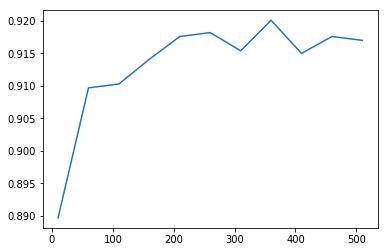

In [42]:
plt.plot(num,num_test_accuracys)

In [53]:
print(np.argmax(num_test_accuracys));
max(num_test_accuracys)

7


0.9201

In [44]:
times

[286.60819697380066,
 278.56571316719055,
 290.9096882343292,
 304.0834414958954,
 314.9463813304901,
 323.2770891189575,
 334.66566586494446,
 365.0907633304596,
 374.27963519096375,
 377.5678400993347,
 390.8193862438202]

##### 参考：  
https://github.com/tensorflow/examples  
https://github.com/tensorflow/examples/tree/master/courses/udacity_intro_to_tensorflow_for_deep_learning